# **Desafio de Ensembles: Previsão de _Churn_ de Clientes**

___


### Allan Almeida Dieguez

> #### Tera / Luizalabs

___


# Base de Dados

Os dados sensíveis ou privados de clientes e produtos estão todos anonimizados, respeitando a privacidade dos mesmos e evitando o vazamento de informações estratégicas da empresa. 

Esses dados anonimizados incluem informações de **IDs de entidades** (clientes, vendas e produtos), os **estados** de origem do cliente e de destino do produto e a **estrutura mercadológica** dos produtos (nomes de categorias e subcategorias às quais pertencem), assim como sua **descrição** (nome do produto incluso).



## Definições de Código

Algumas definições de ambiente serão definidas nessa seção para facilitar o acesso aos dados.

#### Imports

In [1]:
import gdown
import numpy as np
import pandas as pd
import os

### Estrutura de pastas

Criação da estrutura de pastas antes do _download_.

In [2]:
%%bash
if [  -d "data" ]
then 
    echo "folder 'data' already created, do nothing" 
else
    mkdir data
    echo "created 'data' folder"
fi

created 'data' folder


### URLs e Nomes de Arquivos

In [3]:
FILE_INFO = {
    'client_tr': {
        'url':      'https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm',
        'output':   'data/client.train.csv'
    },
    'client_te': {
        'url':      'https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw',
        'output':   'data/client.test.csv'
    },
    'client_ch': {
        'url':      'https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV',
        'output':   'data/client.challenge.csv'
    },
    'orders': {
        'url':      'https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ',
        'output':   'data/orders.csv'
    },
    'product': {
        'url':      'https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ',
        'output':   'data/product.csv'
    }
}

## Descrição das Tabelas e Colunas

Nessa seção serão descritas as tabelas e suas colunas do desafio. Os links para os arquivos e a descrição de cada um está nas seções a seguir. Algumas definições de código e extrações já serão feitas nesse momento, para facilitar o uso dos dados no restante do _notebook_ e para facilitar a explicação de cada elemento.

### Dados de Clientes

Os dados de clientes estão contidos em **3 arquivos** _csv_ já separados em **treino**, **teste** e **desafio**. Isso foi feito previamente para que os três _datasets_ tivessem distribuições justas das **_features_ de interesse**, representando fielmente o domínio do problema.

#### Colunas das Tabelas

As colunas para os três arquivos são:

- `client_id`: ID global único do cliente
- `birthdate`: data de nascimento do cliente
- `state`: estado onde o cliente mora
- `gender`: gênero declarado pelo cliente
- `is_churn`: variável dependente (_target_) que diz se o cliente será _churn_ ou não

#### Dados de Treino: _clients.train.csv_

In [4]:
key = 'client_tr'

In [5]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm
To: /content/data/client.train.csv
100%|██████████| 788k/788k [00:00<00:00, 67.6MB/s]


'data/client.train.csv'

In [6]:
clients_tr = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_tr

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


#### Dados de Teste: _clients.test.csv_

In [7]:
key = 'client_te'

In [8]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw
To: /content/data/client.test.csv
100%|██████████| 263k/263k [00:00<00:00, 66.1MB/s]


'data/client.test.csv'

In [9]:
clients_te = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_te

,birthdate,state,gender,is_churn
client_id,,,,
cx06840,1982-12-03,st15,cg1,False
cx01931,1979-05-09,st15,cg1,False
cx35431,1965-05-09,st15,cg1,False
cx36233,1954-03-15,st15,cg2,False
cx13540,1965-06-19,st15,cg1,False
...,...,...,...,...
cx19119,1980-05-31,st24,cg1,False
cx21963,1984-08-25,st15,cg2,False
cx37195,1960-01-16,st13,cg2,False


#### Dados de Desafio: _clients.challenge.csv_

Interessante notar que está faltando a coluna `is_churn`, que não será fornecida para esse _dataset_.

In [10]:
key = 'client_ch'

In [11]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV
To: /content/data/client.challenge.csv
100%|██████████| 217k/217k [00:00<00:00, 37.4MB/s]


'data/client.challenge.csv'

In [12]:
clients_ch = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_ch

,birthdate,state,gender
client_id,,,
cx12525,1932-04-19,st15,cg1
cx32280,1983-03-01,st15,cg1
cx00471,1964-08-30,st15,cg2
cx18876,1971-04-27,st15,cg2
cx38255,1958-01-26,st15,cg1
...,...,...,...
cx37820,1980-05-01,st04,cg1
cx00770,1964-10-12,st18,cg2
cx01686,1972-07-20,st24,cg2


### Dados de Produtos


In [13]:
key = 'product'

In [14]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ
To: /content/data/product.csv
100%|██████████| 950k/950k [00:00<00:00, 64.3MB/s]


'data/product.csv'

In [15]:
product = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)
product

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


As colunas da Tabela de Produtos são todas simbólicas, representando as diferentes categorias da **árvore de Estrutura Mercadológica** onde o produto está inserido. 

Os nomes das subcategorias herdam o nome da categoria pai, de forma que todas as subcategorias da coluna `category_lv2` que começam com "mk38:072" possuem como categoria pai a `category_lv1` de nome "mk38:072", que por sua vez é filho da `category_lv0` de nome "mk38".

Um exemplo da categorização:

- `category_lv0`: Categorias mais abrangentes dos produtos; e.g. "Eletrônicos" ou "Moda"
- `category_lv1`: Subcategorias; e.g. "Eletrônicos->Notebooks"
- `category_lv2`: Sub-subcategorias; e.g. "Eletrônicos->Notebooks->UltraFinos"

e assim por diante.

A coluna `product_id` é a referência global de produtos, que pode ser combinada por _merge_ com a tabela de vendas.

### Histórico de Vendas

Os **dados do histórico de todas as vendas** de 2019 para **todos os clientes** nos 3 datasets de cliente que compraram qualquer produto - todos contidos no dataset de produtos.

In [16]:
key = 'orders'

In [17]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ
To: /content/data/orders.csv
100%|██████████| 13.3M/13.3M [00:00<00:00, 64.2MB/s]


'data/orders.csv'

In [18]:
orders = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


As colunas dessa tabela estão descritas a seguir.

As colunas de ID de entidade são:
- `order_id`: identificador da venda; pode estar repetida em outras linhas, pois **cada linha corresponde à compra de um produto por um cliente**, que pode ter comprado outros produtos no mesmo evento.
- `client_id`: identificador do cliente que realizou a compra
- `datetime`: data e hora da compra
- `units`: quantidade de unidades do produto que foram comprados nesse evento de compra
- `price`: preço unitário do produto comprado
- `payment_method`: forma de pagamento (crétido, débito, _voucher_, etc) da compra
- `installments`: número de parcelas do pagamento; se estiver vazio, pode-se considerar que não se aplica
- `delivery_days`: prazo de entrega do produto
- `delivery_state`: estado onde ocorreu a entrega do produto; corresponde exatamente ao estado nas tabelas de cliente
- `device`: meio por onde  o cliente comprou; e.g. site, aplicativo do celular, terminal de compras
- `source`: canal de _marketing_ que gerou o _lead_ e ocasionou ao cliente comprar; por exemplo, pode ser um link em uma página parceira onde o cliente viu uma promoção

# Roteiro Sugerido

As etapas a seguir são a sugestão de passos mínima para a solução do problema de forma estruturada. Em alguns passos serão dadas algumas sugestões de código para o melhor aproveitamento do esforço de exploração e construção de solução.

A idéia não é engessar a abordagem, mas apenas criar uma trilha minimamente estruturada para que seja fácil rastrear os passos da solução. O passo inicial será sempre a **análise exploratória** para entender os dados brutos, seguido por um ajuste dos elementos do dataset baseada nas descobertas em uma etapa de **limpeza e pré-processamento** dos dados.

## Análise Exploratória Inicial

O primeiro passo **sempre** deve ser uma boa EDA (ou análise exploratória). Deve-se entender em cada tabela fornecida a distribuição dos dados de cada coluna, o seu tipo e as correlações (no caso de _features_ numéricas) e co-ocorrências (para _features_ categóricas). Sempre é muito importante tentar entender a relação de todas as _features_ disponíveis com a **variável dependente** ou _target_ (no caso, `is_churn`, para entender se há variáveis que já explicam bem o comportamento da saída **antes mesmo de modelar** uma solução.

Sugestão para começar: pegar a tabela de **dados de cliente de treino** `client_tr` e fazer uma exploração das colunas de lá. Depois, buscar fazer uma análise exploratória nas **compras realizadas por esses clientes**, buscando perceber se há alguma relação interessante de comportamento do cliente. Por exemplo, pode-se verificar se o cliente sempre compra produtos para **entregar no mesmo estado em que ele mora**.

Muito importante usar as **técnicas de visualização** como histogramas e tabelas de correlações para ter as idéias certas. Nesses casos, gerar gráficos com as bibliotecas [matplotlib](https://matplotlib.org/) e a [seaborn](https://seaborn.pydata.org/) sempre é muito rico. Quando trabalhar com gráficos, sempre seguir a **regra de ouro**: se um gráfico **não mostra explicitamente o comportamento** que quer observar, a análise por esse gráfico pode não ser interessante, siga adiante para outra visualização.

Mais uma sugestão de feramentas: além da biblioteca `pandas`, as bibliotecas `numpy` e `scikit-learn` também possuem muitas ferramentas de análise interessantes.

In [19]:
''' sugestão de imports '''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## *Funções Auxiliares*

In [20]:
def agg_count(df, col, level):
    """ Agrega as estatísticas básicas (do tipo `describe` a partir da granularidade definida em `level`.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    col: string
        Nome da coluna pai referência.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    Return
    ------

    DataFrame
        Tabela hierárquica com a contagem de `level`

    """
    return (df
            .reset_index()
            .groupby(col)[level]
            .apply(lambda x: x.unique().shape[0])
            .to_frame()
            .rename(columns=lambda x: f'{level}_per_{col}'))

In [21]:
def agg_describe(df, level, **kwargs):
    """ Agrega as estatísticas básicas (do tipo `describe` a partir da granularidade definida em `level`.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    **kwargs
        Parâmetros da função `describe`


    Return
    ------

    DataFrame
        Tabela com as estatísticas por coluna.

    """
    output = None
    columns = df.loc[:, :level].columns.difference([level])
    for col in columns:
        desc = agg_count(df, col, level).describe(**kwargs)
        if output is None:
            output = desc
        else:
            output = output.join(desc)
    return output.T.rename(columns={'count': 'unique_level_ids'})

In [22]:
def agg_boxplot(df, level, vertical=False, figsize=(20, 10), **kwargs):
    """ Mostra um gráfico de boxplot de dados hierárquicos agregados.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    vertical: bool (default=False)
        Define a orientação do `boxplot`; sobrescreve parâmetros padrão do `seaborn`.

    figsize: tuple (default=(20, 10)))
        Tabanho da figura no padrão `matplotlib.pyplot`.

    **kwargs
        Parâmetros da função `sns.boxplot`


    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.

    """
    data = pd.DataFrame()
    columns = df.loc[:, :level].columns.difference([level])
    for col in columns:
        tmp = agg_count(product, col, 'product_id')
        name = tmp.columns[0]
        tmp.columns = ['count']
        tmp['level'] = f'{level}_per_{col}'
        data = data.append(tmp)
    plt.figure(figsize=figsize)
    if vertical:
        kwargs.update({'x': "level", 'y': "count", 'orient': "v"})
    else:
        kwargs.update({'x': "count", 'y': "level", 'orient': "h"})
    ax = sns.boxplot(data=data.reset_index(drop=True), **kwargs)
    plt.title('Distribuição de produtos por nível de categoria')
    plt.grid(True)
    return ax

In [23]:
def distplot(df, col, figsize=(15, 8), grid=True, boxplot_kw=dict(), histplot_kw=dict(), describe_kw=dict()):
    """ Mostra um gráfico de boxplot com o histograma de uma coluna

    Parameters
    ----------
    
    df: DataFrame
        Tabela de dados.

    level: string
        Nome da coluna cuja distribuição será avaliada.

    figsize: tuple (default=(15, 8))
        Tabanho da figura no padrão `matplotlib.pyplot`.

    boxplot_kw : dict (default=dict())
        Parâmetros da função `sns.boxplot`

    histplot_kw : dict (default=dict())
        Parâmetros da função `sns.histplot`
    
    describe_kw : dict (default=dict())
        Parâmetros da função `pd.DataFrame.describe()`


    Return
    ------

    DataFrame
        Tabela contendo as 

    """
    _, (ax_b, ax_h) = plt.subplots(2, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=ax_b, **boxplot_kw)
    sns.histplot(data=df, x=col, ax=ax_h, **histplot_kw)
    plt.grid(grid)
    return df[[col]].describe(**describe_kw).T

In [24]:
#Percentis para gráficos
perc = np.linspace(0.1, 0.9, 9)

### clients_tr

In [25]:
clients_tr 

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


In [26]:
clients_tr.info() #sem valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  23292 non-null  datetime64[ns]
 1   state      23292 non-null  object        
 2   gender     23292 non-null  object        
 3   is_churn   23292 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(2)
memory usage: 750.6+ KB


In [27]:
# Distribuição do estado
clients_tr[["state"]].value_counts() # Marioria dos clientes estão no estado 15, mas há muitos também no 25,21,04

state
st15     8201
st25     3501
st21     2135
st04     1646
st22     1230
st08     1021
st16      990
st01      786
st03      651
st09      505
st24      477
st02      430
st18      426
st13      356
st26      309
st11      229
st23      203
st12       68
st17       52
st05       36
st06       28
st20        4
st14        2
st19        2
st07        2
st10        1
st27        1
dtype: int64

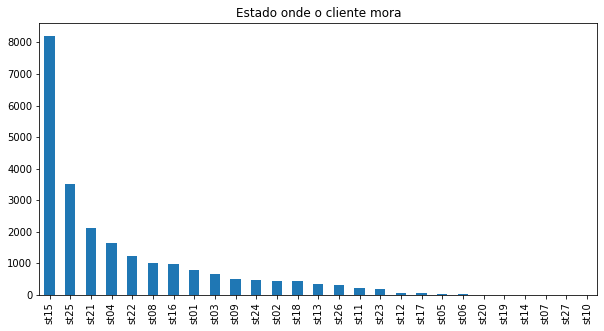

In [28]:
f, ax = plt.subplots(figsize=(10, 5))
clients_tr.state.value_counts().plot(kind='bar', title="Estado onde o cliente mora", ax=ax, figsize=(10,5))
plt.show()

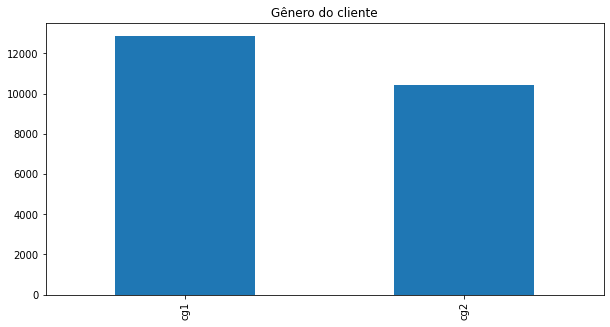

In [29]:
# Distribuição do gênero
f, ax = plt.subplots(figsize=(10, 5))
clients_tr.gender.value_counts().plot(kind='bar', title="Gênero do cliente", ax=ax, figsize=(10,5))
plt.show()

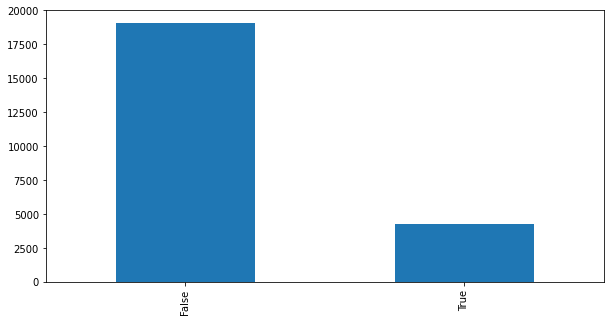

In [30]:
# Distribuição do churn
f, ax = plt.subplots(figsize=(10, 5))
clients_tr.is_churn.value_counts().plot(kind='bar', ax=ax, figsize=(10,5))
plt.show()

In [31]:
# Verificando dados que foram classificados como is_churn
clients_tr[clients_tr['is_churn'] ==1][:30] #Maioria dos churn estão nos estados 15 e 25, mas esses são os com mais clientes

,birthdate,state,gender,is_churn
client_id,,,,
cx29470,1950-03-14,st15,cg1,True
cx20280,1965-10-23,st15,cg1,True
cx37032,1950-11-20,st15,cg1,True
cx27555,1965-05-21,st15,cg2,True
cx18502,1960-11-29,st15,cg1,True
cx05537,1953-10-08,st15,cg1,True
cx00725,1986-11-13,st25,cg2,True
cx31613,1953-06-30,st15,cg1,True
cx18135,1957-12-01,st25,cg1,True


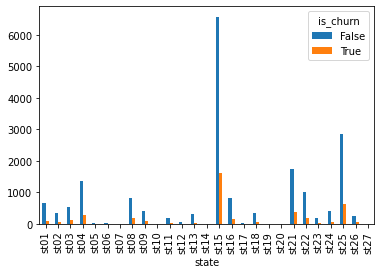

In [32]:
# Quais estados se tornam mais churn?
clients_tr.groupby('is_churn')['state'].value_counts().unstack(0).plot.bar()

In [33]:
# Quais estados se tornam mais churn?
print(clients_tr[(clients_tr['is_churn'] == 1)]['state'].value_counts()) #Acontece mais no estado 15, depois 25

st15    1624
st25     646
st21     383
st04     277
st22     203
st08     195
st16     172
st03     111
st01     106
st09      91
st02      77
st24      75
st18      68
st26      51
st13      44
st11      34
st23      24
st12      11
st17       8
st05       3
st20       2
st06       2
Name: state, dtype: int64


In [34]:
# Qual gênero se tornam mais churn?
print(clients_tr[(clients_tr['is_churn'] == 1)]['gender'].value_counts()) #Acontece mais no gênero 1

cg1    2247
cg2    1960
Name: gender, dtype: int64


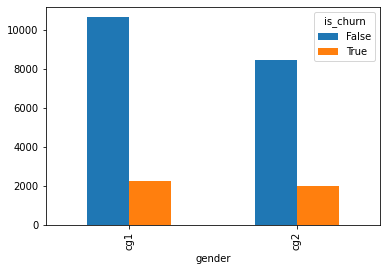

In [35]:
clients_tr.groupby('is_churn')['gender'].value_counts().unstack(0).plot.bar()

O gênero em si não é predidtivo, sendo distribuído quase uniformemente pelas classes de churn.

In [36]:
#Criando variável idade
data = clients_tr[['is_churn']].join(2021 - clients_tr.birthdate.dt.year.to_frame().rename(columns=lambda x: 'age'))
data

,is_churn,age
client_id,,
cx05072,False,49
cx03836,False,55
cx08472,False,67
cx12946,False,66
cx19045,False,63
...,...,...
cx05312,False,40
cx02434,False,24
cx16024,False,71


,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
age,23292.0,44.234415,13.702858,11.0,28.0,32.0,35.0,39.0,42.0,46.0,51.0,56.0,64.0,121.0


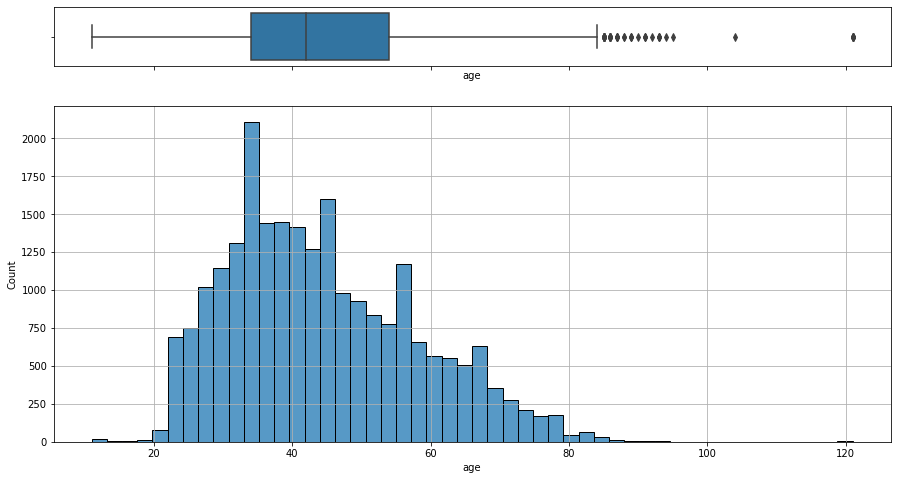

In [37]:
# Calculando a idade do cliente
distplot(data, 'age', describe_kw={'percentiles': perc}, histplot_kw={'bins': 50})

Maior parte dos clientes estão entre as idades 30 e 54 anos (quartis). Há algumas anomalias de idades, como pessoas com mais de 100 anos e abaixo de 18 anos. 

count       mean        std   min   25%   50%   75%    max
    is_churn                                                              
age False     19085.0  43.578622  13.361827  11.0  33.0  41.0  52.0  121.0
    True       4207.0  47.209413  14.794861  11.0  36.0  45.0  58.0  121.0

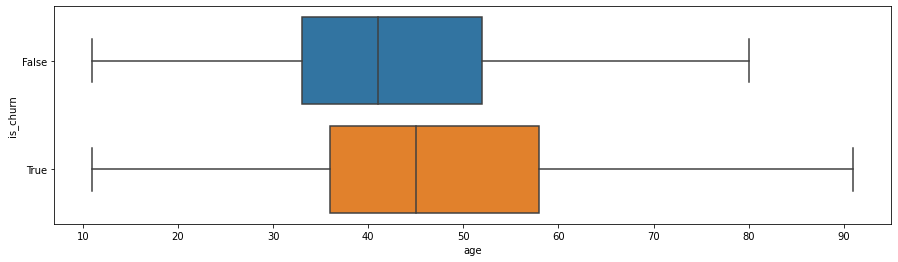

In [38]:
# Proporção de churn pelas idades para estimar o potencial preditivo da idade para o churn.
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, x='age', y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

É interessante notar que há um potencial preditivo na idade do cliente. Pelas distribuições, há uma leve tendência de pessoas mais velhas se tornarem churn.

**Conclusão**
- Não há dados faltantes
- A maioria dos clientes estao nos estados 15 (principalmente), 25 e 21, sendo estes os estados com maior churn
- Os gêneros dos clientes de aproximam em quantidade e churn e não são preditivos.
- Há uma leve tendência de clientes mais velhos se tornarem churn.

### orders

In [39]:
# Histórico de vendas
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


In [40]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 168472 entries, ox008433 to ox079633
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       168472 non-null  object        
 1   product_id      168472 non-null  object        
 2   datetime        168472 non-null  datetime64[ns]
 3   units           168472 non-null  float64       
 4   price           168472 non-null  float64       
 5   payment_method  168472 non-null  object        
 6   installments    36545 non-null   float64       
 7   delivery_days   89642 non-null   float64       
 8   delivery_state  168472 non-null  object        
 9   device          168472 non-null  object        
 10  source          168472 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 15.4+ MB


In [41]:
orders.isnull().mean().round(4)*100 #installments com muitos valores vazios, mas pode-se considerar que não se aplica
#delivery_days que é o prazo de entrega com quase metade dos valores vazios

client_id          0.00
product_id         0.00
datetime           0.00
units              0.00
price              0.00
payment_method     0.00
installments      78.31
delivery_days     46.79
delivery_state     0.00
device             0.00
source             0.00
dtype: float64

In [42]:
orders.describe(percentiles = [.25, .5, .75, .90, .95, .99]) #Dados de preço estão em uma escala muito maior, pode ser interessante normalizar
#Maioria das compras tem 1 unidade

,units,price,installments,delivery_days
count,168472.000000,168472.000000,36545.000000,89642.000000
mean,1.228846,451.384291,4.551293,7.017938
std,1.504511,857.769280,4.704385,6.855334
min,0.000000,-8999.000000,1.000000,0.000000
25%,1.000000,39.900000,1.000000,2.000000
50%,1.000000,162.580000,3.000000,5.000000
75%,1.000000,699.000000,7.000000,9.000000
90%,1.000000,1494.000000,10.000000,15.000000
95%,2.000000,2050.000000,12.000000,20.000000
99%,6.000000,3499.000000,24.000000,32.000000


Verificando as compras que possuem mais de 5 itens.

In [43]:
#Resetando index
df = orders.reset_index()
#Avaliando compras com mais de 5 itens que são a minoria
index = (df.units > 10) 

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
units,301.0,24.132886,17.601962,11.0,12.0,12.0,12.0,16.0,18.0,20.0,24.0,30.0,50.0,110.0


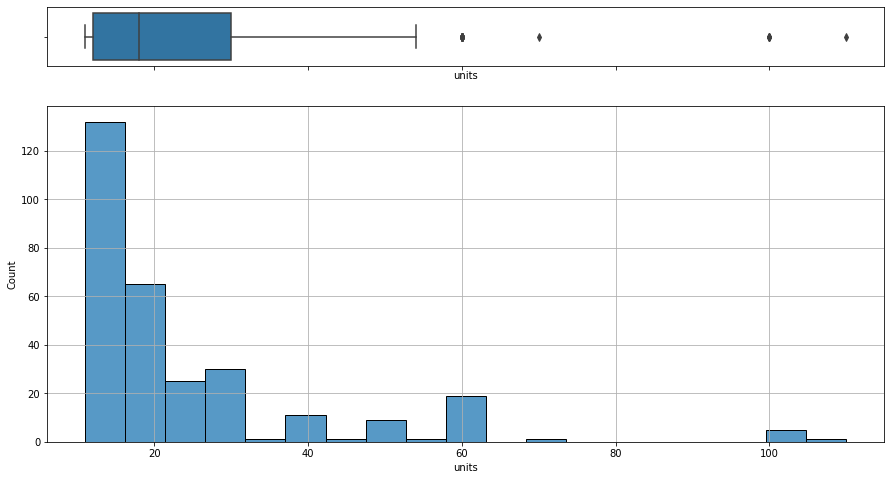

In [44]:
distplot(df[index], 'units', describe_kw={'percentiles': perc}, boxplot_kw={'showfliers': True})

In [45]:
# Distribuição do métodos de pagamento
orders[["payment_method"]].value_counts()

payment_method
pm05              131927
pm02               14182
pm14                7068
pm10                5337
pm09                3096
pm03                2539
pm06                1728
pm13                1154
pm04                 895
pm12                 227
pm01                 214
pm07                  60
pm08                  37
pm11                   8
dtype: int64

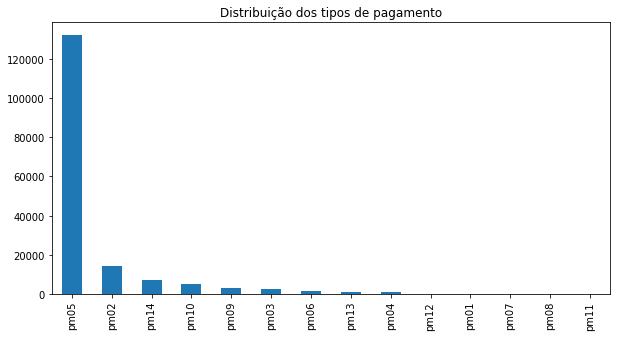

In [46]:
f, ax = plt.subplots(figsize=(10, 5))
orders.payment_method.value_counts().plot(kind='bar', title="Distribuição dos tipos de pagamento", ax=ax, figsize=(10,5))
plt.show() #Maioria estão no pagamento05

In [47]:
# Distribuição do meio de compra
orders[["device"]].value_counts()

device
dv9       97794
dv3       42078
dv5       10453
dv7        8833
dv4        7922
dv8         808
dv2         256
dv1         189
dv6         139
dtype: int64

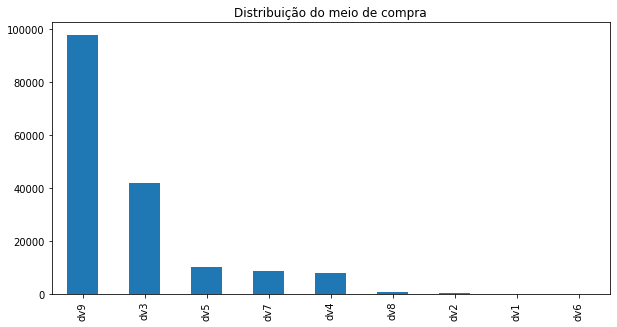

In [48]:
f, ax = plt.subplots(figsize=(10, 5))
orders.device.value_counts().plot(kind='bar', title="Distribuição do meio de compra", ax=ax, figsize=(10,5))
plt.show() #Maioria estão no método dv9 e um pouco no dv3

In [49]:
# Distribuição do canal de marketing
orders[["source"]].value_counts()

source
sc08      97796
sc12      35398
sc11      10692
sc04       8110
sc09       7489
sc05       4596
sc10       1263
sc14       1262
sc07        700
sc01        483
sc06        313
sc02        182
sc15         62
sc16         55
sc03         53
sc13         18
dtype: int64

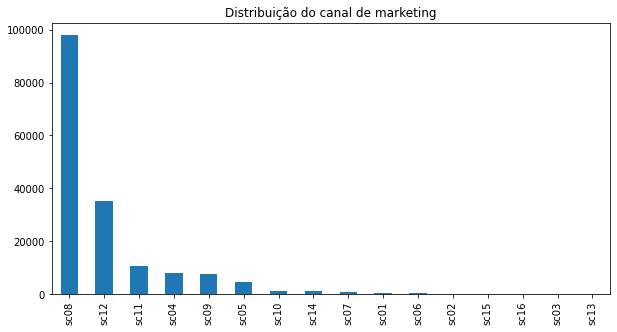

In [50]:
f, ax = plt.subplots(figsize=(10, 5))
orders.source.value_counts().plot(kind='bar', title="Distribuição do canal de marketing", ax=ax, figsize=(10,5))
plt.show() #Maioria estão no sc08 e um pouco no sc12

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,max
price,168472.0,451.384291,857.76928,-8999.0,5.0,29.0,39.9,52.9,99.0,162.58,266.49,500.0,699.0,884.762,1494.0,25648.9


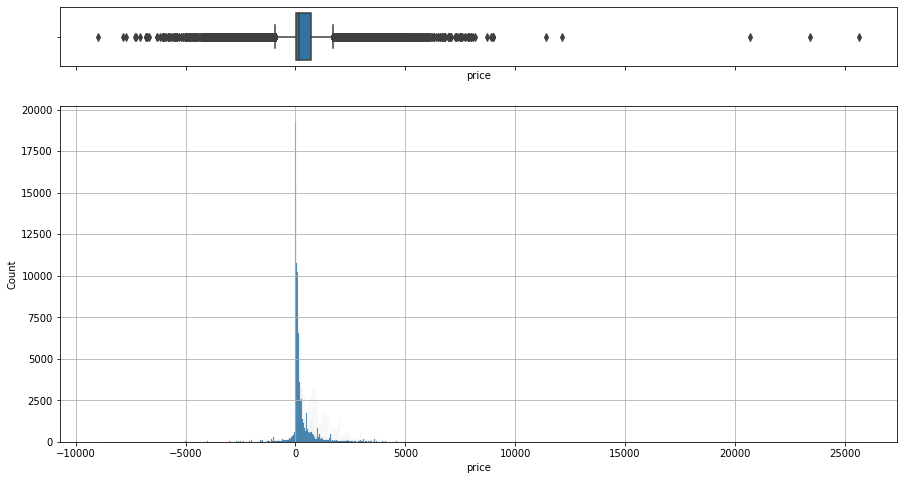

In [51]:
#Preço
desc = distplot(df, 'price', describe_kw={'percentiles': list(perc) + [.25, .75]})
desc

A quantidade de outliers é muito grande, precisam ser eliminados para uma visualização melhor. Para cortam ambos os gráficos, será usado o cálculo dos limites inferior e superior dos outliers usando o método da distância interquartil - a mesma usada na biblioteca gráfica.

In [52]:
iqr = desc['75%'] - desc['25%']
lsup = (desc['mean'] + 1.5 * iqr).price
linf = (desc['mean'] - 1.5 * iqr).price
linf, lsup

(-537.2657092573247, 1440.0342907426755)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
price,146504.0,294.094802,372.027305,-535.0,6.49,29.9,49.9,87.9,129.97,199.9,329.0,599.9,899.0,1440.0


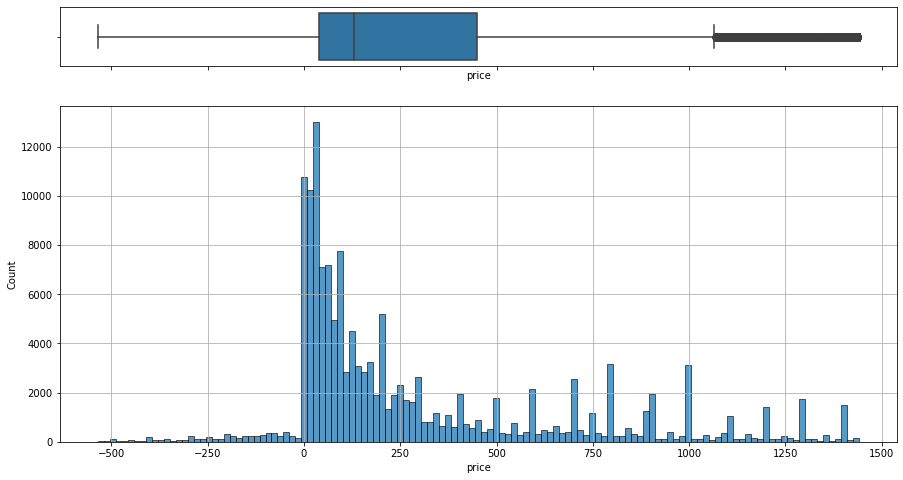

In [53]:
index = (df.price >= linf) & (df.price <= lsup)
distplot(df[index], 'price', describe_kw={'percentiles': perc})

Existem preços negativos; esses preços podem ser referentes a uma devolução ou cancelamento da compra.

In [54]:
# Estatísticas Descritivas do Preço
%%time
client_ids = clients_tr.index
stats = df.loc[df.client_id.isin(client_ids), ['client_id', 'price']]
features = (
    stats.groupby('client_id').price.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
                  mean          std      min        25%       50%        75%      max  is_churn
client_id                                                                                      
cx00002    1494.000000          NaN  1494.00  1494.0000  1494.000  1494.0000  1494.00     False
cx00004     454.027143   620.273303   100.22   110.0850   139.900   459.4500  1799.00     False
cx00005     194.487500    83.919906    72.00   173.9625   228.475   249.0000   249.00      True
cx00008    1022.620000  1235.485252   149.00   585.8100  1022.620  1459.4300  1896.24     False
cx00009     999.500000  1406.435388     5.00   502.2500   999.500  1496.7500  1994.00     False
cx00010     207.202500   156.269568    29.90   100.5500   219.500   326.1525   359.91     False
cx00011     182.250000   280.913393     1.00     3.9400    66.960   245.2700   594.08      True
cx00015     132.653333    41.472928    99.04   109.4800   119.920   149.4600   179.00      True
cx00016     936.633333   789.

count         mean          std       min         25%  \
     is_churn                                                            
mean False     19085.0   549.215816   601.092225 -1616.460  147.340000   
     True       4207.0   524.768104   576.414183 -1560.125  149.930000   
std  False     19085.0   460.029881   580.986506    -1.000   14.785603   
     True       4207.0   508.226119   622.270522    -1.000   54.287349   
min  False     19085.0   122.949922   755.779529 -8999.000    5.040000   
     True       4207.0    41.959867   749.727965 -6740.000    5.000000   
25%  False     19085.0   310.612701   603.385296 -5255.100   44.910000   
     True       4207.0   255.817823   587.697433 -5494.080   39.900000   
50%  False     19085.0   482.257479   632.378641 -4500.000   96.000000   
     True       4207.0   464.991166   621.045245 -3739.000   99.900000   
75%  False     19085.0   726.803763   753.540502 -2694.100  176.550000   
     True       4207.0   741.309603   759.368945     0.010  196.748750   
max  False     19085.0  1146.471962  1070.013508     0.000  278.910000   
     True       4207.0  1144.770578  1074.200536     0.010  290.005000   

                      50%          75%           max  
     is_churn                                         
mean False     375.780000   735.455000  12891.905000  
     True      371.872500   705.538810  13550.890000  
std  False     306.820703   684.760302  18041.115344  
     True      356.253708   733.591004  13942.222395  
min  False      49.900000   189.910000   6119.100000  
     True       39.900000   144.985000   5194.200000  
25%  False     129.900000   369.000000   6513.407500  
     True      117.970000   324.250000   8621.570000  
50%  False     243.435000   649.000000  12891.905000  
     True      239.900000   643.680000  13550.890000  
75%  False     510.517500  1002.620000  19270.402500  
     True      561.540000  1044.000000  18480.210000  
max  False     898.990000  1659.900000  25648.900000  
     True      899.000000  1599.900000  23409.530000

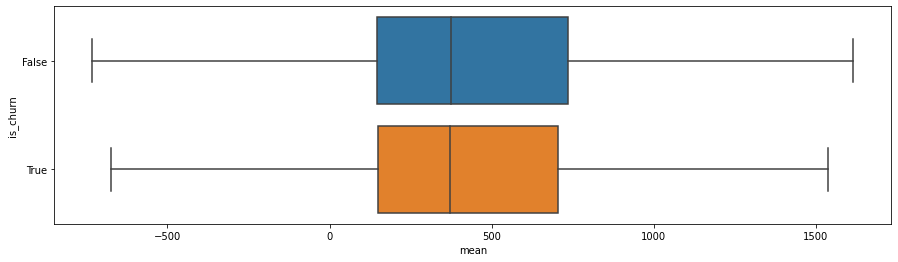

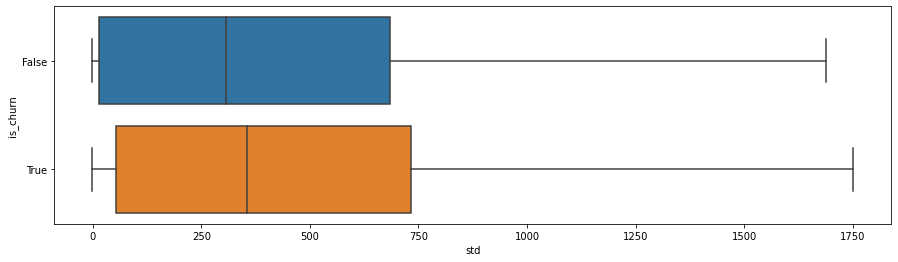

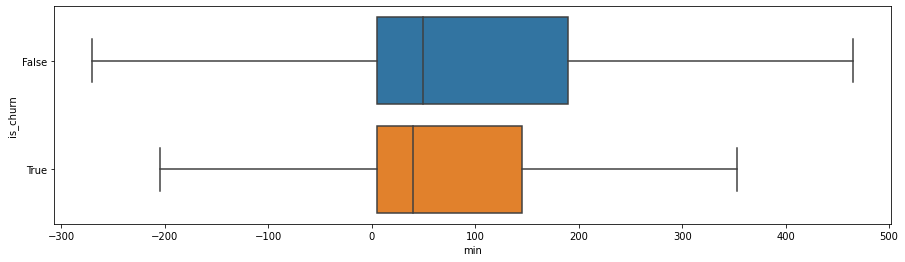

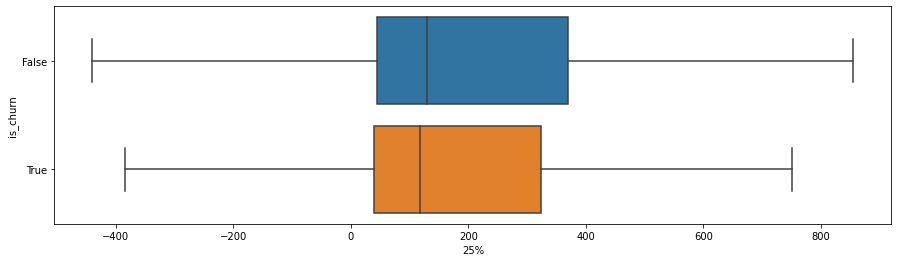

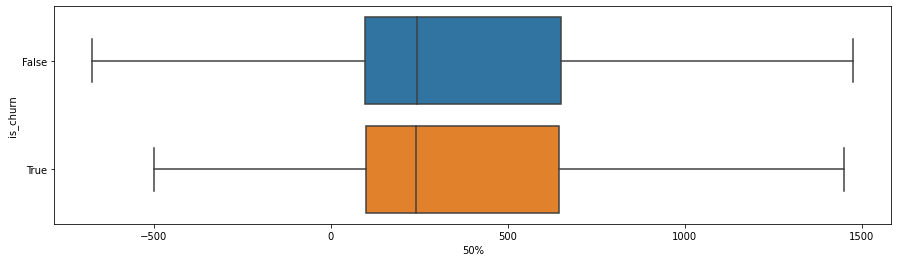

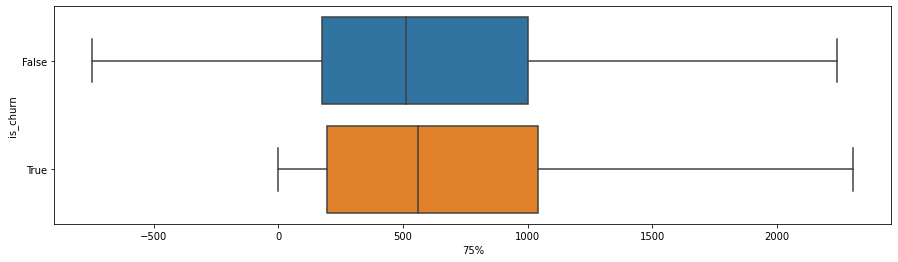

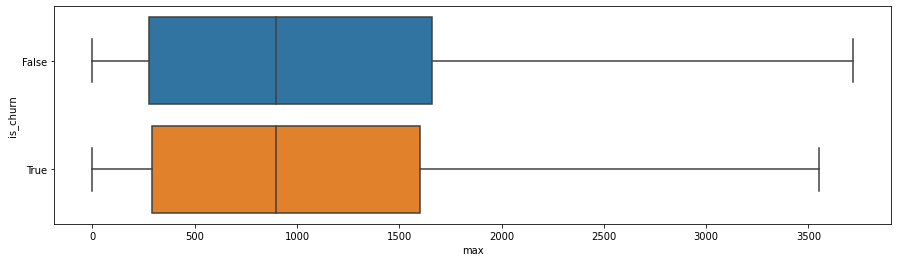

In [55]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

As estatísticas descritivas do preço aparentam ter um bom poder preditivo.

### product

In [56]:
product

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


In [57]:
product.isnull().mean()

category_lv0    0.0
category_lv1    0.0
category_lv2    0.0
category_lv3    0.0
category_lv4    0.0
dtype: float64

,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
product_id_per_category_lv0,52.0,243.442308,301.488036,1.0,2.0,5.4,25.5,78.6,139.0,251.2,285.2,378.6,620.5,1273.0
product_id_per_category_lv1,296.0,42.766892,66.539574,1.0,1.0,3.0,6.0,11.0,17.0,26.0,42.5,65.0,112.5,563.0
product_id_per_category_lv2,893.0,14.175812,25.803313,1.0,1.0,1.0,2.0,3.0,5.0,7.0,11.0,19.0,36.0,237.0
product_id_per_category_lv3,1218.0,10.393268,20.617354,1.0,1.0,1.0,2.0,2.0,4.0,5.0,8.0,13.0,23.0,237.0
product_id_per_category_lv4,10763.0,1.176159,0.498651,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,10.0


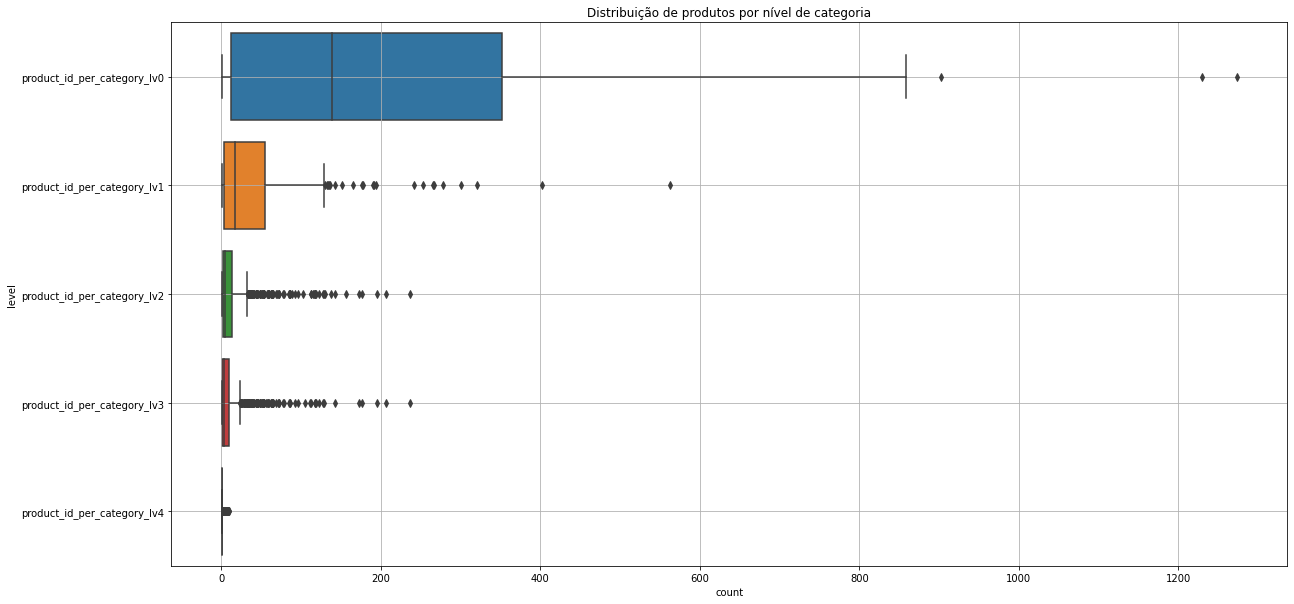

In [58]:
# Distribuição de product_id nas categorias
level = 'product_id'
agg_boxplot(product, level, figsize=(20, 10))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

A quantidade de produtos em cada nível tem uma distribuição que se mantem estável nas 3 primeiras categorias (até category_lv2), com menos de 20 variações na média e na mediana. Dada essa variação menor, é possível que os produtos especificado a partir de category_lv2 com o mesmo pai em category_lv1 são muito parecidos entre si, podendo ser considerados de compras similares.

Pode-se estimar que, em um primeiro momento, considerar apenas os níveis category_lv0 e category_lv1 para análise.

## Limpeza & Pré-Processamento

Depois de explorar os dados brutos, é importante entender se já existem dados _outliers_ ou errados que corrompem ou invalidam certos registros (linhas da tabela) e que deveriam 1) serem tratados de alguma forma ou 2) eliminados do dataset. Se essa necessidade não surgiu com a EDA, das duas uma: ou não há realmente nada a fazer, ou é necessário explorar mais os dados pra entendê-los.

- Serão eliminados as variáveis installments e delivery_days por conterem muitos dados faltantes.   
- Nas transformações da feature engineering que usam a estatística descritiva sobre os dados, todo dado nulo será convertido para numérico igual a -1, decisão que mantém o entendimento do modelo de que é um dado nulo e fora do range tradicional. Todas as explorações, onde foi feita comparação com o target, esse imputter foi usado.

## *Feature Engineering*

Essa é a etapa que pode dar mais trabalho, devido ao formato de eventos da **tabela de vendas**. Para facilitar um pouco, será dada a seguir uma sugestão de _feature engineering_. Caso haja uma vontade de incluir mais _features_, basta editar o código a seguir.


### Funções Auxiliares

Funções para ajudar nas diferentes ĩdéias de _feature engineering_.

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [60]:
class OrderAggregatorFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe base para FeaturesTransformers que usam os dados de Histórico de Vendas para extrair os dados.
    """
    
    def __init__(self, orders_table, columns=None, product_table=None, imputer=None):
        
        self.work_table = None
        if product_table is not None:
            self.refr_table = pd.merge(
                orders_table,
                product_table.reset_index(),
                on='product_id'
            )
        else:
            self.refr_table = orders_table.copy()
        if columns is not None:
            self.refr_table = self.refr_table[['client_id', *columns]]
        self._reset_database()
        self.imputer = imputer
        self.columns = columns

    def _reset_database(self):
        self.work_table = self.refr_table.copy()
        return self

    def _process_client(self, df):
        return df.set_index('client_id')

    def _select_orders(self, df):
        idx = self.work_table['client_id'].isin(df.index)
        return self.work_table[idx]

    def fit(self, X, y=None, **fit_params):
        if self.imputer is not None:
            self._reset_database()
            self.imputer.fit(self._select_orders(X)[self.columns])
            self.work_table.loc[:, self.columns] = self.imputer.transform(self.work_table[self.columns])
        return self
    
    def transform(self, X):
        return self._select_orders(X).groupby('client_id').apply(self._process_client)

In [61]:
class UniqueCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x.unique())).rename(index=lambda x: f'count_{x}')

In [62]:
class SumValuesTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.sum().rename(index=lambda x: f'sum_{x}')

In [63]:
class DistributionTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = (super()
               ._process_client(df)
               .describe()
               .drop(index='count')
               .rename(index=lambda c: c.replace('%', 'p')) 
               .rename(index={'mean': 'avg'})
               .unstack())
        tmp.index = tmp.index.map('_'.join)
        return tmp

In [64]:
class CountStateMatchesTransform(OrderAggregatorFeaturesTransform):
    
    def _process_client(self, df):
        tmp = df.set_index('client_id')[['state', 'delivery_state']]
        return pd.Series({
            'count_orders_states_eq': (tmp.state == tmp.delivery_state).sum(),
            'count_orders_states_ne': (tmp.state != tmp.delivery_state).sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

### Sugestão de Feature Engineering		

Algumas features interessantes para serem extraidas dos dados, por cliente, estão mostradas a seguir.

- `gender_g1`: __bool_ calculada a partir do `gender`
- `client_age`: calculada a partir do `birthdate`

- `sum_units`: total de itens comprados em 2019
- `sum_volume`: total gasto em compras em 2019

- `count_orders_states_ne`: quantidade de compras entregando em estados diferentes ao do cliente
- `count_orders_states_eq`: quantidade de compras entregando em estados iguais ao do cliente

- `count_product_id`: quantidade de produtos diferentes presentes nas compras
- `count_device`: quantidade de produtos diferentes presentes nas compras
- `count_source`: quantidade de produtos diferentes presentes nas compras
- `count_payment_method`: quantidade de meios de pagamento em compras

- `count_category_lv0`: quantidade de categorias diferentes (nível 0) em compras
- `count_category_lv1`: quantidade de categorias diferentes (nível 1) em compras
- `count_category_lv2`: quantidade de categorias diferentes (nível 2) em compras
- `count_category_lv3`: quantidade de categorias diferentes (nível 3) em compras
- `count_category_lv4`: quantidade de categorias diferentes (nível 4) em compras

- `price_avg`: média dos preços pagos em cada item comprado
- `price_std`: desvio padrão dos preços pagos em cada item comprado
- `price_min`: mínimo dos preços pagos em cada item comprado
- `price_25p`: quartil 25% dos preços pagos em cada item comprado
- `price_50p`: quartil 50% dos preços pagos em cada item comprado
- `price_75p`: quartil 75% dos preços pagos em cada item comprado
- `price_max`: máximo dos preços pagos em cada item comprado


In [65]:
class FeatureEngineeringTransform(BaseEstimator, TransformerMixin):

    def __init__(self, orders_table, product_table):
        orders_table['volume'] = orders_table.units * orders_table.price
        self._transf_sum = SumValuesTransform(orders_table=orders_table, columns=['units', 'volume'])
        self._transf_stt = CountStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state']])
        self._transf_cnt = UniqueCounterTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['product_id', 'device', 'source', 'payment_method', 
                     'category_lv0', 'category_lv1', 'category_lv2', 'category_lv3', 'category_lv4']
        )
        self._transf_dst_med = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['price'],
            imputer=SimpleImputer(strategy='median')
        )
        
    def fit(self, X, y=None, **fit_params): 
        self._transf_dst_med.fit(X)
        return self
    
    def transform(self, X):
        output = (X[['gender']] == 'cg1').rename(columns={'gender': 'gender_cg1'})
        output['client_age'] = 2021 - X.birthdate.dt.year
        output = output.join(self._transf_sum.transform(X))
        output = output.join(self._transf_stt.transform(X))
        output = output.join(self._transf_cnt.transform(X))
        output = output.join(self._transf_dst_med.transform(X))
        return output

In [66]:
%%time
feateng = FeatureEngineeringTransform(orders, product).fit(clients_tr)

CPU times: user 615 ms, sys: 100 ms, total: 715 ms
Wall time: 727 ms


In [67]:
%%time
fname = 'data/client.train.features.v1.csv'
if os.path.exists(fname):
    print(f'Loading file "{fname}" from disk.')
    train_dataset = pd.read_csv(fname, sep=',', encoding='utf-8', index_col=0)
else:
    print('Creating Dataset')
    train_dataset = feateng.transform(clients_tr)
    train_dataset.to_csv(fname, sep=',', encoding='utf-8')
print('Dataset Ready')
print(train_dataset.shape)
print(train_dataset.head().to_string())

Creating Dataset
Dataset Ready
(23292, 22)
           gender_cg1  client_age  sum_units  sum_volume  count_orders_states_eq  count_orders_states_ne  count_product_id  count_device  count_source  count_payment_method  count_category_lv0  count_category_lv1  count_category_lv2  count_category_lv3  count_category_lv4   price_avg    price_std  price_min  price_25p  price_50p  price_75p  price_max
client_id                                                                                                                                                                                                                                                                                                                                                       
cx05072         False          49        2.0      119.80                       0                       2                 2             1             1                     1                   1                   2                   2                   

In [68]:
%%time
fname = 'data/client.test.features.v1.csv'
if os.path.exists(fname):
    print(f'Loading file "{fname}" from disk.')
    test_dataset = pd.read_csv(fname, sep=',', encoding='utf-8', index_col=0)
else:
    print('Creating Dataset')
    test_dataset = feateng.transform(clients_te)
    test_dataset.to_csv(fname, sep=',', encoding='utf-8')
print('Dataset Ready')
print(test_dataset.shape)
print(test_dataset.head().to_string())

Creating Dataset
Dataset Ready
(7764, 22)
           gender_cg1  client_age  sum_units  sum_volume  count_orders_states_eq  count_orders_states_ne  count_product_id  count_device  count_source  count_payment_method  count_category_lv0  count_category_lv1  count_category_lv2  count_category_lv3  count_category_lv4    price_avg    price_std  price_min  price_25p  price_50p  price_75p  price_max
client_id                                                                                                                                                                                                                                                                                                                                                        
cx06840          True          39        9.0       412.4                       0                       7                 7             1             1                     1                   3                   3                   7                  

## Análise Exploratória nas Novas _Features_

In [69]:
pd.set_option('display.max_columns', None)
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,count_category_lv0,count_category_lv1,count_category_lv2,count_category_lv3,count_category_lv4,price_avg,price_std,price_min,price_25p,price_50p,price_75p,price_max
client_id,,,,,,,,,,,,,,,,,,,,,,
cx05072,False,49,2.00000,119.800000,0,2,2,1,1,1,1,2,2,2,2,59.900000,14.142136,49.90,54.9000,59.90,64.90,69.90
cx03836,True,55,8.00000,625.720000,0,7,6,1,1,1,3,6,6,6,6,78.108571,83.710286,-54.92,57.4100,78.96,89.00,229.90
cx08472,True,67,3.00000,2832.920000,0,3,2,1,1,1,2,2,2,2,2,944.306667,1575.138551,34.90,34.9000,34.90,1399.01,2763.12
cx12946,True,66,1.00000,69.900000,0,1,1,1,1,1,1,1,1,1,1,69.900000,NaN,69.90,69.9000,69.90,69.90,69.90
cx19045,False,63,16.00000,794.840000,1,14,14,2,2,1,5,5,10,10,14,48.996000,42.163274,-59.00,35.9000,49.90,59.90,144.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,40,4.00000,1038.020000,0,3,3,1,1,1,3,3,3,3,3,293.006667,266.595462,120.00,139.5000,159.00,379.51,600.02
cx02434,False,24,1.00000,1952.900000,0,1,1,1,1,1,1,1,1,1,1,1952.900000,NaN,1952.90,1952.9000,1952.90,1952.90,1952.90
cx16024,True,71,4.00000,1158.000000,0,3,3,1,1,1,3,3,3,3,3,326.000000,196.181039,180.00,214.5000,249.00,399.00,549.00


In [70]:
train_dataset.isnull().agg(['sum', 'mean']).T

,sum,mean
gender_cg1,0.0,0.000000
client_age,0.0,0.000000
sum_units,0.0,0.000000
sum_volume,0.0,0.000000
count_orders_states_eq,0.0,0.000000
count_orders_states_ne,0.0,0.000000
count_product_id,0.0,0.000000
count_device,0.0,0.000000
count_source,0.0,0.000000
count_payment_method,0.0,0.000000


Como esperado, os campos std gerados por estatistica descritiva estão vindo nulos. Isso se deve ao fato de que algumas compras terão apenas um valor, o que torna o cálculo do std inviável.

Como definido nas etapas anteriores, esses valores serão transformados em -1. Os dados também serão normalizados com um StandardScaler nas variáveis numéricas.

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scale_cols = train_dataset.columns[1:]
scale_cols

Index(['client_age', 'sum_units', 'sum_volume', 'count_orders_states_eq',
       'count_orders_states_ne', 'count_product_id', 'count_device',
       'count_source', 'count_payment_method', 'count_category_lv0',
       'count_category_lv1', 'count_category_lv2', 'count_category_lv3',
       'count_category_lv4', 'price_avg', 'price_std', 'price_min',
       'price_25p', 'price_50p', 'price_75p', 'price_max'],
      dtype='object')

In [73]:
train_dataset = train_dataset.fillna(-1)
scaler = StandardScaler().fit(train_dataset[scale_cols])
scaler

StandardScaler()

In [74]:
train_dataset.loc[:, scale_cols] = scaler.transform(train_dataset.loc[:, scale_cols])
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,count_category_lv0,count_category_lv1,count_category_lv2,count_category_lv3,count_category_lv4,price_avg,price_std,price_min,price_25p,price_50p,price_75p,price_max
client_id,,,,,,,,,,,,,,,,,,,,,,
cx05072,False,0.347788,-0.294982,-0.654008,-0.480636,-0.159651,-0.483604,-0.541915,-0.538487,-0.543817,-0.894074,-0.460879,-0.482974,-0.483553,-0.481263,-0.812555,-0.771906,-0.077349,-0.409061,-0.665084,-0.880648,-1.005174
cx03836,True,0.785662,0.236881,-0.487896,-0.480636,1.185909,0.591497,-0.541915,-0.538487,-0.543817,0.224485,1.062056,0.862853,0.823581,0.604620,-0.782043,-0.653778,-0.216128,-0.404884,-0.634847,-0.848710,-0.855742
cx08472,True,1.661411,-0.206338,0.236808,-0.480636,0.109461,-0.483604,-0.541915,-0.538487,-0.543817,-0.334794,-0.460879,-0.482974,-0.483553,-0.481263,0.669460,1.878689,-0.097208,-0.442343,-0.704744,0.887357,1.510150
cx12946,True,1.588432,-0.383625,-0.670392,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,-0.795798,-0.797617,-0.050869,-0.384100,-0.649220,-0.874022,-1.005174
cx19045,False,1.369494,0.946031,-0.432368,-0.204918,3.069692,2.741699,1.107626,1.068076,-0.543817,1.343044,0.681322,2.208680,2.130715,2.776386,-0.830827,-0.724325,-0.221530,-0.440679,-0.680948,-0.887275,-0.935090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,-0.309024,-0.117694,-0.352523,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,0.224485,-0.080145,-0.146517,-0.156770,-0.209792,-0.421934,-0.343236,0.015462,-0.268278,-0.507871,-0.463717,-0.510070
cx02434,False,-1.476688,-0.383625,-0.052135,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,2.359577,-0.797617,2.442177,2.749395,2.337986,1.621390,0.753448
cx16024,True,1.953327,-0.117694,-0.313129,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,0.224485,-0.080145,-0.146517,-0.156770,-0.209792,-0.366647,-0.462801,0.094901,-0.143471,-0.365094,-0.437888,-0.557720


In [75]:
test_dataset = test_dataset.fillna(-1)
test_dataset.loc[:, scale_cols] = scaler.transform(test_dataset.loc[:, scale_cols])
test_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,count_category_lv0,count_category_lv1,count_category_lv2,count_category_lv3,count_category_lv4,price_avg,price_std,price_min,price_25p,price_50p,price_75p,price_max
client_id,,,,,,,,,,,,,,,,,,,,,,
cx06840,True,-0.382003,0.325525,-0.557937,-0.480636,1.185909,0.860272,-0.541915,-0.538487,-0.543817,0.224485,-0.080145,1.199310,1.150365,0.876091,-0.831395,-0.769344,-0.095884,-0.438100,-0.690149,-0.896551,-0.995834
cx01931,True,-0.163065,-0.117694,-0.617956,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.146517,-0.156770,-0.209792,-0.798591,-0.702786,-0.110448,-0.438183,-0.680948,-0.847518,-0.949137
cx35431,True,0.858641,-0.383625,-0.667404,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,-0.780549,-0.797617,-0.038821,-0.368956,-0.634783,-0.861963,-0.996675
cx36233,False,1.661411,-0.294982,0.831122,-0.480636,-0.159651,-0.483604,-0.541915,-0.538487,-0.543817,-0.334794,-0.460879,-0.482974,-0.483553,-0.481263,2.977246,3.940755,0.318653,1.721565,2.922736,3.416881,2.939910
cx13540,True,0.858641,-0.117694,-0.632994,-0.480636,0.378573,0.053947,-0.541915,-0.538487,-0.543817,-0.334794,-0.460879,-0.146517,-0.156770,0.061679,-0.835931,-0.768253,-0.105020,-0.444673,-0.684835,-0.887275,-1.014513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx19119,True,-0.236045,-0.383625,-0.431002,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,0.425967,-0.797617,0.914442,0.829193,0.507430,0.092205,-0.324233
cx21963,False,-0.527961,-0.383625,-0.680537,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,-0.847578,-0.797617,-0.091780,-0.435520,-0.698240,-0.914972,-1.034033
cx37195,False,1.223536,-0.383625,-0.657163,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,-0.894074,-0.841612,-0.819431,-0.810337,-0.752733,-0.728283,-0.797617,0.002474,-0.317053,-0.585303,-0.820629,-0.967545


Para entender melhor o comportamento desses dados, será feita uma comparação de suas distribuições com o target.

In [76]:
data = pd.melt(train_dataset, ignore_index=False).join(clients_tr[['is_churn']])
data

,variable,value,is_churn
client_id,,,
cx00002,gender_cg1,False,False
cx00002,client_age,-0.892856,False
cx00002,sum_units,-0.383625,False
cx00002,sum_volume,-0.202808,False
cx00002,count_orders_states_eq,-0.480636,False
...,...,...,...
cx38817,price_min,0.0007,False
cx38817,price_25p,-0.27674,False
cx38817,price_50p,-0.506316,False


In [77]:
data = data.rename(columns={'variable': 'feature'})
data.loc[:, 'value'] = data.loc[:, 'value'].astype(float)
data

,feature,value,is_churn
client_id,,,
cx00002,gender_cg1,0.000000,False
cx00002,client_age,-0.892856,False
cx00002,sum_units,-0.383625,False
cx00002,sum_volume,-0.202808,False
cx00002,count_orders_states_eq,-0.480636,False
...,...,...,...
cx38817,price_min,0.000700,False
cx38817,price_25p,-0.276740,False
cx38817,price_50p,-0.506316,False


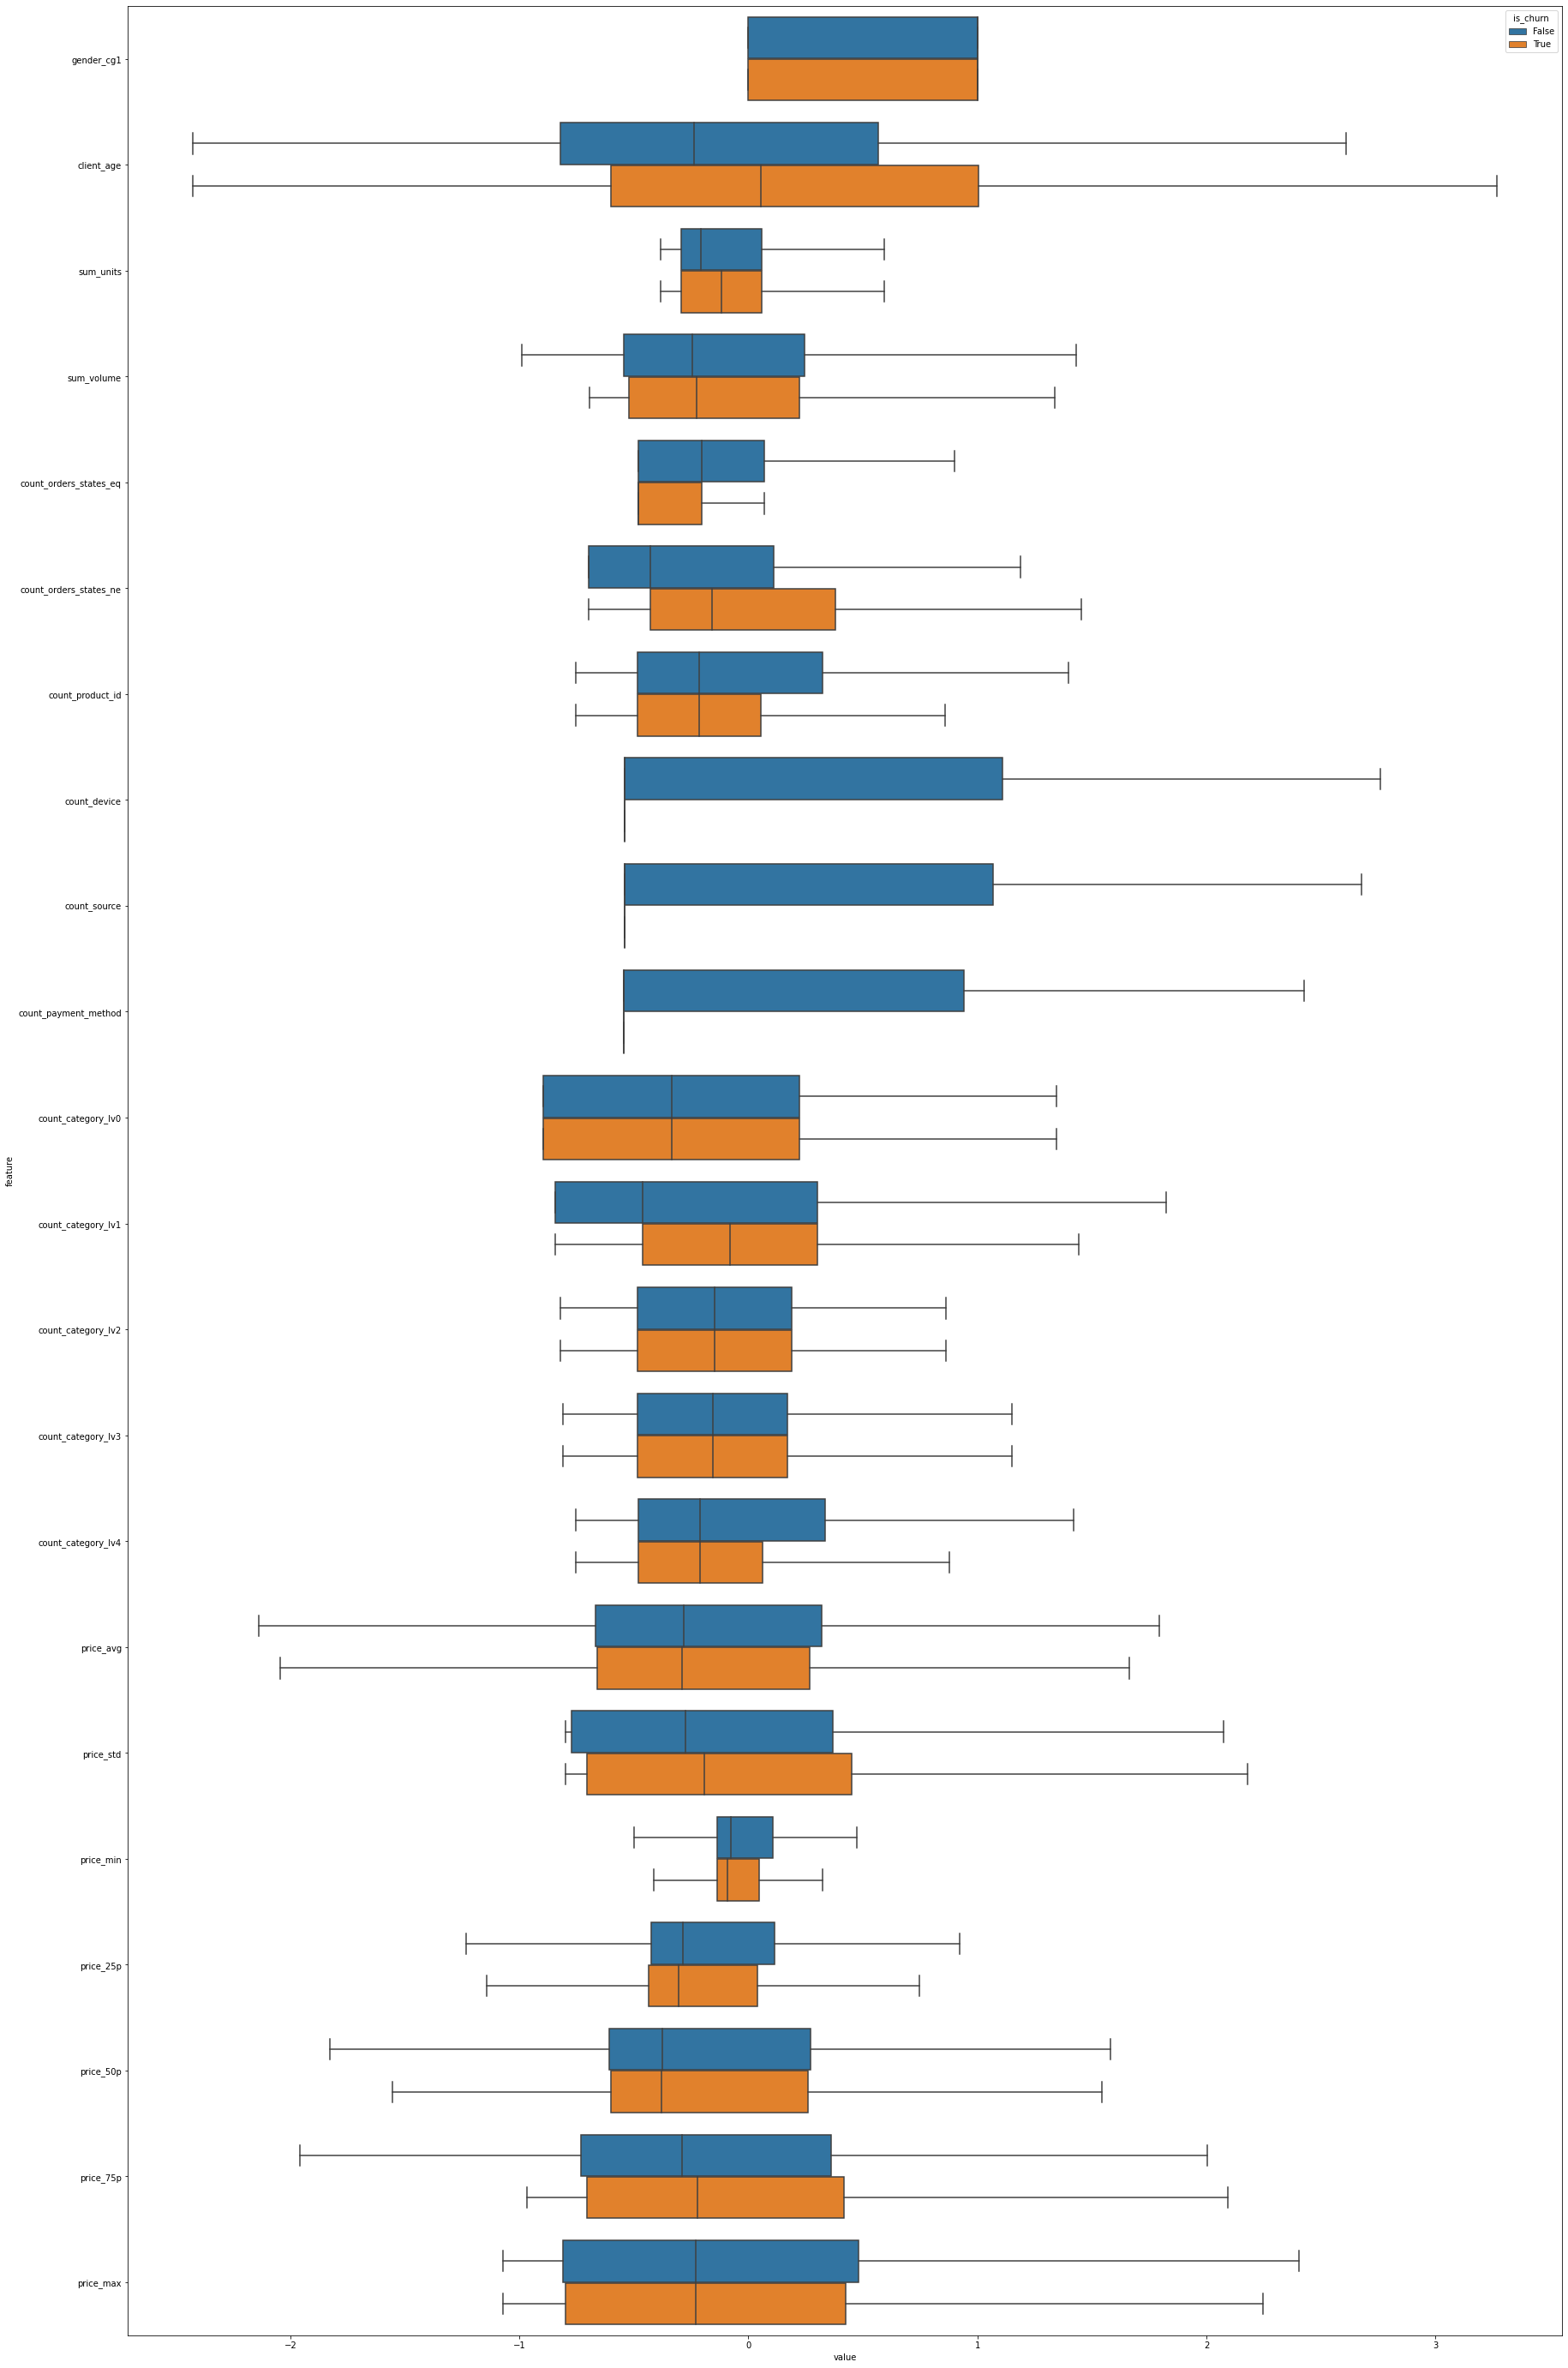

In [78]:
plt.figure(figsize=(30, 50))
ax = sns.boxplot(data=data, y="feature", x="value", hue="is_churn", showfliers=False)

## Treinar um Modelo Baseline

Antes de começar a treinar modelos muito complexos, sempre é interessante verificar **se um modelo mais simples já resolve**. Além da vantagem de adquirir mais conhecimento sobre o problema, com modelos simples como [árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) ou uma boa [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) trazem bons insights sobre o que o modelo aprendeu sobre o problema durante  o treinamento. Com sorte, também é possível ter maior compreensao sobre o **impacto direto de cada _feature_** na decisão de saída do modelo, trazendo uma dimensão de explicabilidade para a solução.

Funções Auxiliares

In [134]:
# Imports & Configs
from sklearn.metrics import (
    plot_confusion_matrix as plot_mdc, 
    plot_roc_curve as plot_roc, 
    classification_report
)
plt.rcParams['font.size'] = 12

In [135]:
#DummyModel
class DummyModel(object):
    """ Interface que simula o funcionamento de um modelo, usado para funções de plot baseadas em modelos.
    """

    def __init__(self, y_pred: pd.Series = None, y_prob: pd.Series = None):
        self.y_pred = y_pred
        self.y_prob = y_prob
        self._estimator_type = "classifier"
        self.classes_ = [0, 1]

    def predict(self, X):
        if self.y_pred is None:
            return self.y_pred
        return self.y_pred.values

    def predict_proba(self, X):
        if self.y_prob is None:
            return self.y_prob
        return self.y_prob.values

In [136]:
def plot_confusion_matrix(y_true, y_prob, threshold=0.5, fontsize=26, figsize=(10, 10), cmap='Blues', **kwargs):
    """ Adaptação da função `plot_confusion_matrix` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    fontsize: int (default=26)
        Tamanho da fonte usada no plot.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    cmap: string (default='Blues')
        Nome do colormap usado no plot.

    **kwargs
        Parametros da função original `plot_confusion_matrix` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    original_fontsize = plt.rcParams['font.size']
    plt.rcParams['font.size'] = fontsize
    y_pred = (y_prob >= threshold).astype(int)
    print(classification_report(y_true, y_pred))
    resp = plot_mdc(
        estimator=DummyModel(y_pred, y_prob),
        X=None, y_true=y_true,
        cmap=cmap, ax=plt.figure(figsize=figsize).gca(), 
        **kwargs
    )
    plt.rcParams['font.size'] = original_fontsize
    return resp

In [137]:
def plot_roc_curve(y_true, y_prob, figsize=(10, 10), **kwargs):
    """ Adaptação da função `plot_roc_curve` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    **kwargs
        Parametros da função original `plot_roc_curve` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    return plot_roc(
        estimator=DummyModel(y_prob=y_prob),
        X=None, y=y_true,
        ax=plt.figure(figsize=figsize).gca(),
        **kwargs
    )

In [138]:
def calculate_far_frr(y_true, y_prob, n_points=30, normalize=False, threshold=None):
    """ Função que calcula os dados para a visualização FAR/FRR.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    n_points: int
        Resolução (quantidade de pontos gerados) do plot.

    normalize: bool
        Escolha entre calcular sobre a saída bruta (quantidade de elementos por corte) ou 
        normalizada (percentual de cada dataset).
        
    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    Return
    ------

    dict
        Dicionário contendo os campos:
            - 'optm': corte ótimo (calculado quando `threshold` for None)
            - 'plot': DataFrame com os parâmetros usados para o plot do FAR/FRR


    """
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_prob[y_true == 0] >= t
        frr_pt = y_prob[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

In [139]:
def plot_far_frr(figsize=(15,10), grid=True, **kwargs):

    """ Função que faz  o plot da visualização FAR/FRR.

    Parameters
    ----------
    
    figsize: tuple (default=(15, 10)),
        Tamanho da imagem na tela.
        
    grid: bool
        Booleada para mostrar/esconder o grid na imagem final.

    **kwargs
        Parâmetros da função `calculate_far_frr`

    Return
    ------

    dict
        Saída da função `calculate_far_frr`


    """
    ffdf = calculate_far_frr(**kwargs)
    plt.figure(figsize=figsize)
    ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
    ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
    plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
    plt.grid(grid)
    plt.xlim(0, 1)
    plt.ylim(0, ffdf['plot'].max().max())
    plt.xlabel('threshold')
    plt.ylabel('count')
    plt.legend()
    return ffdf

In [140]:
from collections.abc import Sequence
def classifier_evaluation(y_true, y_pred, betas=1):
    """ Calcula as métricas de avaliação de um classificador para alimentar a Tabela de Resultados

    Parameters
    ----------

    y_true: Series
        Saída esperada (targets).

    y_pred: Series
        Saída categórica estimada pelo modelo.

    betas: float or Sequence (default=1)
        Número ou seqência de números representando os Betas das métricas de FBetaScore desejadas.

    Return
    ------
    Series
        Lista de parâmetros de métricas no formato de Series do pandas

    """
    if not isinstance(betas, Sequence):
        betas = [betas]
    tn, fp, fn, tp = confusion_matrix(y_true.values, y_pred.values).ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)
    precision = tp / (fp + tp)
    recall = tp / (fn + tp)
    return pd.Series({
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        **{
            f'f{b}_score': (1 + b ** 2) * precision * recall / (((b ** 2) * precision) + recall)
            for b in betas
        }
    })


In [141]:
def results_table(entry_name, existing_table=None, **kwargs):
    """ Calcula as métricas de avaliação de um classificador para alimentar a Tabela de Resultados

    Parameters
    ----------

    entry_name: string
        Nome da nova entrada da tabela; caso já exista, atualiza os valores.

    existing_table: DataFrame or None (default=None)
        Tabela previamente existente, para atualização. Se for None, cria uma tabela.

    **kwargs
        Parâmetros de `classifier_evaluation`

    Return
    ------
    DataFrame
        Tabela de resultados atualizada

    """
    metrics = pd.DataFrame({entry_name: classifier_evaluation(**kwargs)}).T
    metrics.index.name = 'modelos'
    if existing_table is None:
        return metrics
    elif entry_name in existing_table.index:
        existing_table.loc[entry_name, :] = metrics
        return existing_table
    return existing_table.append(metrics)


### Definições

In [142]:
y_true_tr = clients_tr.is_churn
y_true_tr.value_counts()

False    19085
True      4207
Name: is_churn, dtype: int64

In [143]:
y_true_te = clients_te.is_churn
y_true_te.value_counts()

False    6368
True     1396
Name: is_churn, dtype: int64

In [144]:
modelos_treinados = dict()
modelos_threshold = dict()
tabela_resultados = None

### Modelo Baseline - Regressão Logística

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
model = LogisticRegression(max_iter=1000)
model.fit(train_dataset.values, clients_tr.is_churn.values)

LogisticRegression(max_iter=1000)

In [147]:
#massa de treino
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx05072    0.227413
cx03836    0.242183
cx08472    0.286243
cx12946    0.245635
cx19045    0.172166
             ...   
cx05312    0.193379
cx02434    0.121910
cx16024    0.266372
cx11285    0.281977
cx00861    0.189486
Length: 23292, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


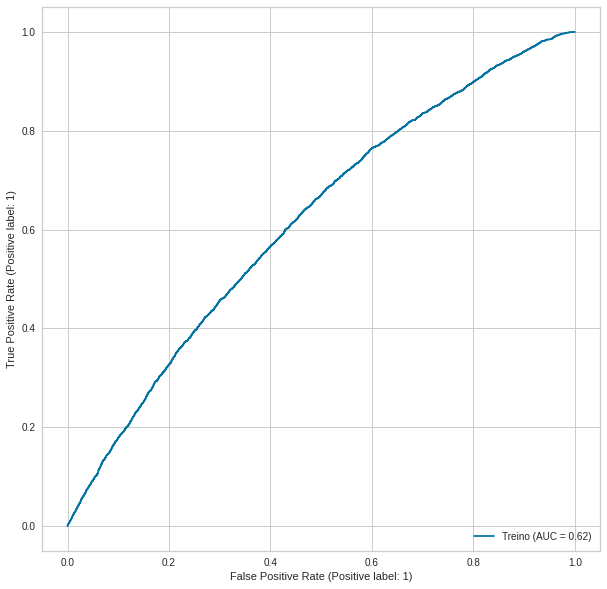

In [148]:
#roc AUC
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

Threshold de Treino: 0.23232323232323235


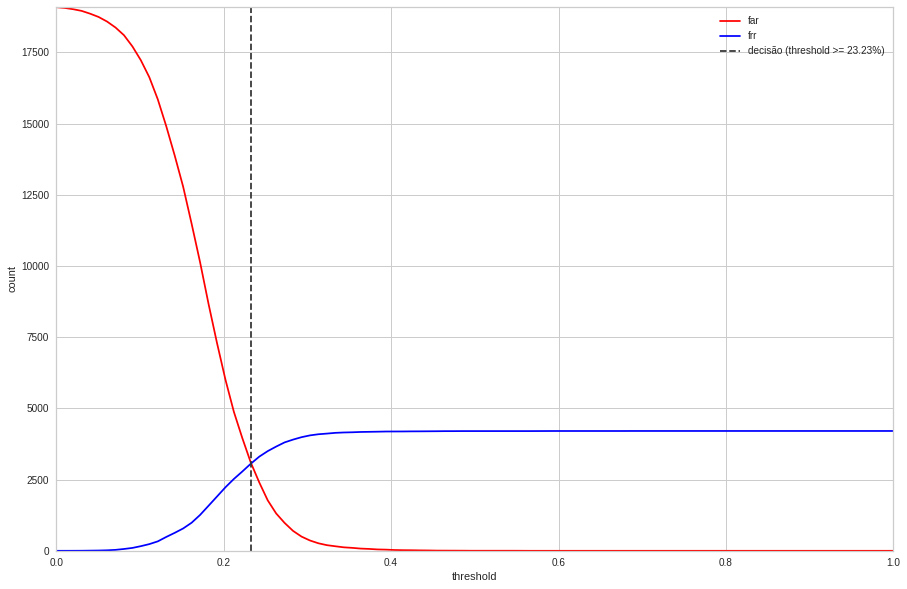

In [149]:
#far/frr
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.84      0.84      0.84     19085
        True       0.27      0.27      0.27      4207

    accuracy                           0.74     23292
   macro avg       0.56      0.56      0.56     23292
weighted avg       0.74      0.74      0.74     23292



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


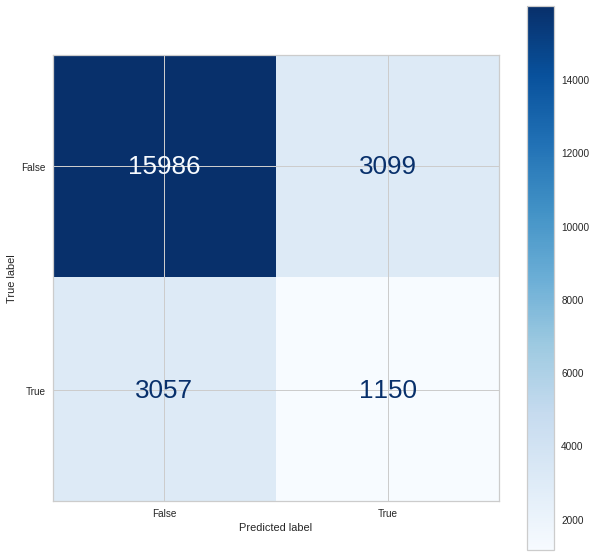

In [150]:
# métricas de classificacao
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

In [151]:
#Massa de teste
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx06840    0.143164
cx01931    0.165680
cx35431    0.220345
cx36233    0.283107
cx13540    0.203828
             ...   
cx19119    0.165120
cx21963    0.197629
cx37195    0.253446
cx16851    0.133736
cx15796    0.083283
Length: 7764, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


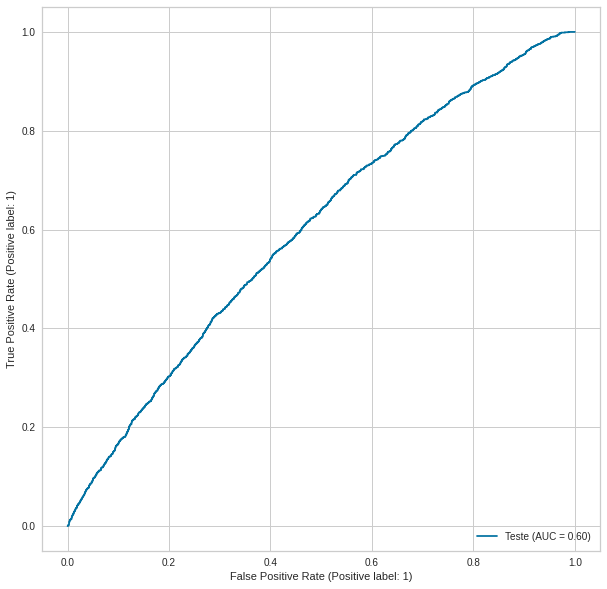

In [152]:
#Roc AUC
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

Threshold de Treino: 0.23232323232323235
Threshold de Teste: 0.23232323232323235


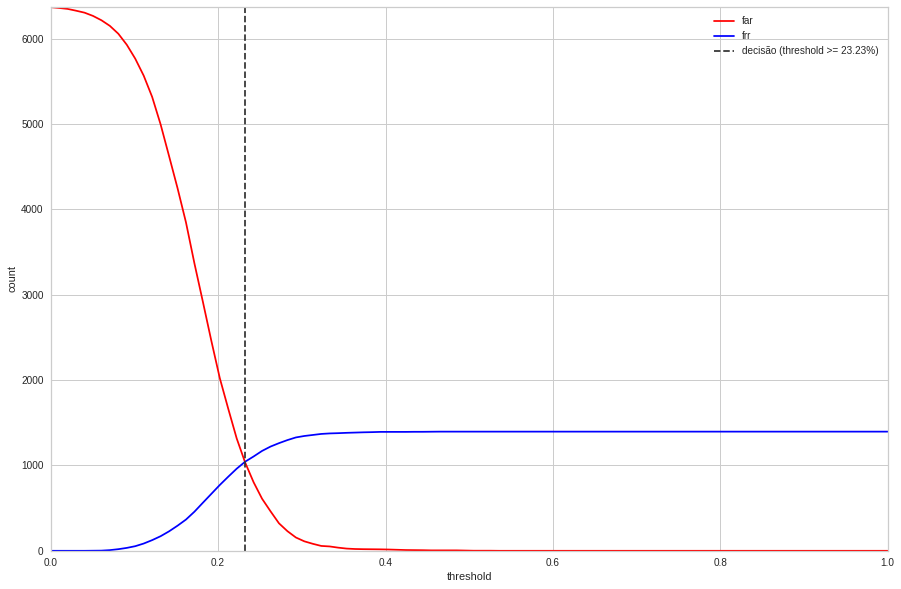

In [153]:
#FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      6368
        True       0.25      0.25      0.25      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.54      0.55      7764
weighted avg       0.73      0.73      0.73      7764



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


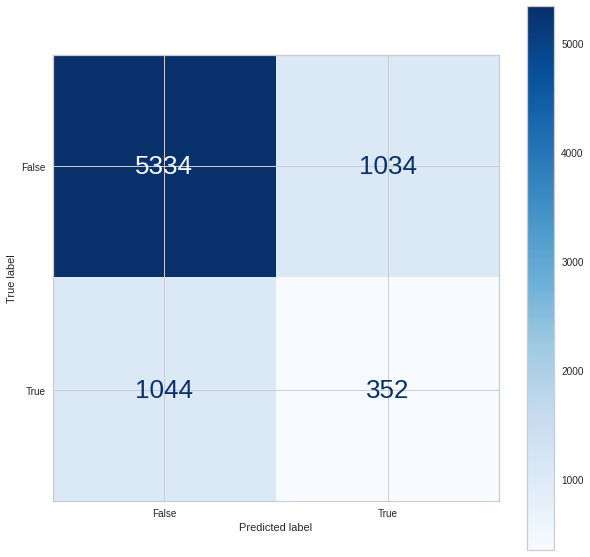

In [154]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

### Tabela de Resultados

In [155]:
nome_modelo = 'LogisticRegression (baseline)'

In [156]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000)}

In [157]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235}

In [158]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055


## Treinar Modelos mais Complexos

Após treinar um modelo **_baseline_** e comprender se o problema tem questões de **viés** ou de **variância** (ou ambos) a serem resolvidos, a idéia é treinar modelos mais complexos (e mais fortes) para maximizar a performance da solução. 

Algumas sugestões de modelos a serem treinados:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): _ensemble_ de árvores de decisão do tipo **_bagging_**, diminuem **variância**
- [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): _ensemble_ de árvores de decisão do tipo **_boosting_**, diminuem **variância** e **viés**
- [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html): modelo com foco na otimização da separação entre as classes, muito eficientes em classificação binária

Lembrando de sempre armazenar na **tabela de resultados** as métricas de cada modelo treinado.


### **Random Forest**

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier(n_estimators=5000, max_depth=13)
model.fit(train_dataset.values, clients_tr.is_churn.values)

RandomForestClassifier(max_depth=13, n_estimators=5000)

Avaliação do Treinamento

In [161]:
#Massa de Treino
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx05072    0.171855
cx03836    0.298312
cx08472    0.194412
cx12946    0.200937
cx19045    0.095440
             ...   
cx05312    0.230473
cx02434    0.132319
cx16024    0.238059
cx11285    0.068414
cx00861    0.250176
Length: 23292, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


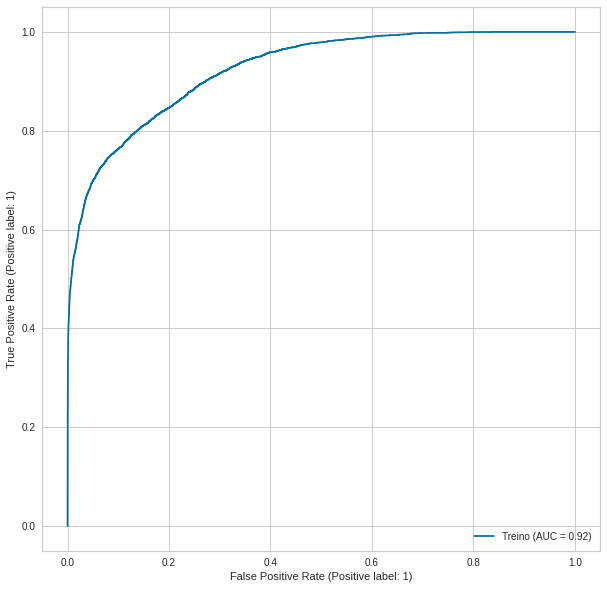

In [162]:
#Roc AUC
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

Threshold de Treino: 0.25252525252525254


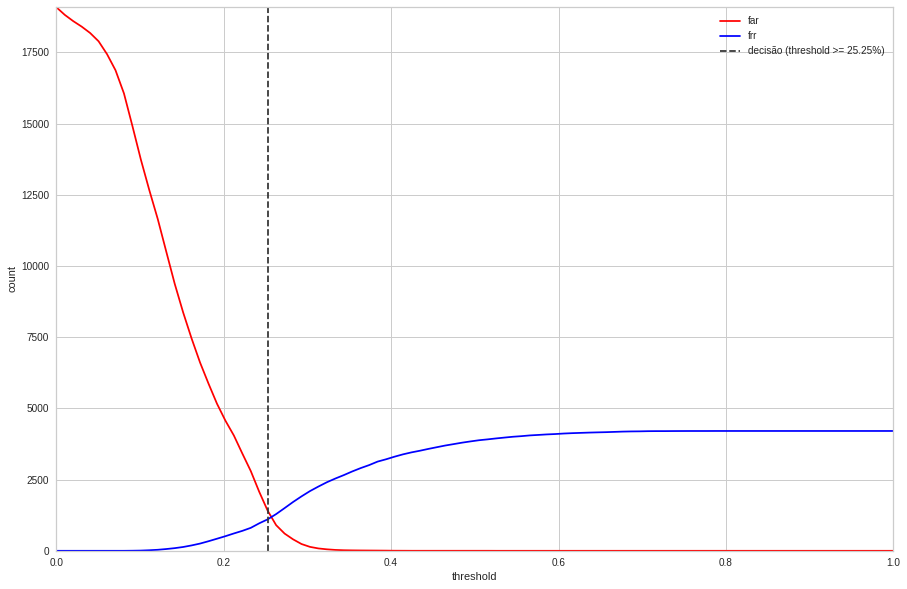

In [163]:
#FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.94      0.93      0.93     19085
        True       0.69      0.74      0.71      4207

    accuracy                           0.89     23292
   macro avg       0.81      0.83      0.82     23292
weighted avg       0.90      0.89      0.89     23292



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


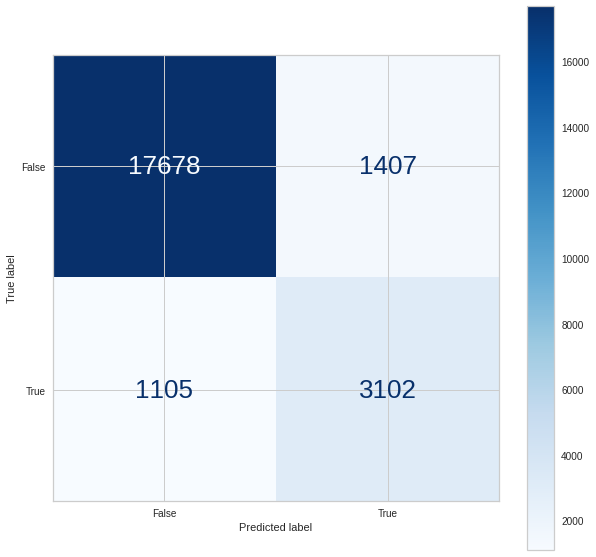

In [164]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

In [165]:
#Massa de Teste
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx06840    0.320206
cx01931    0.252659
cx35431    0.197818
cx36233    0.230167
cx13540    0.307773
             ...   
cx19119    0.121385
cx21963    0.221139
cx37195    0.177885
cx16851    0.110233
cx15796    0.114590
Length: 7764, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


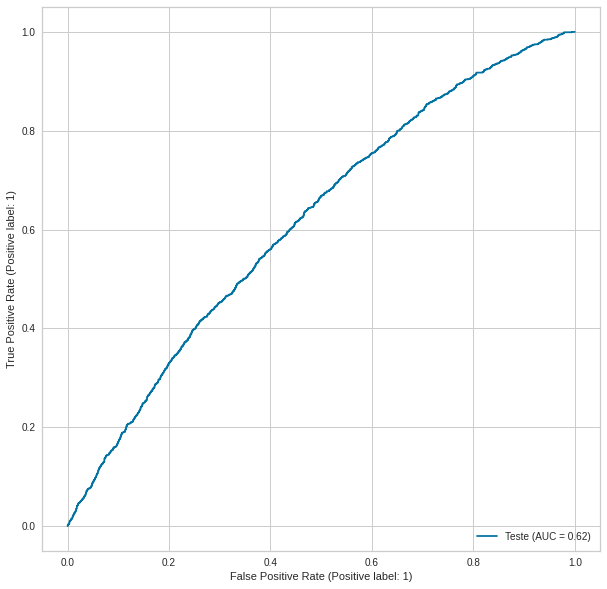

In [166]:
#Roc AUC
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


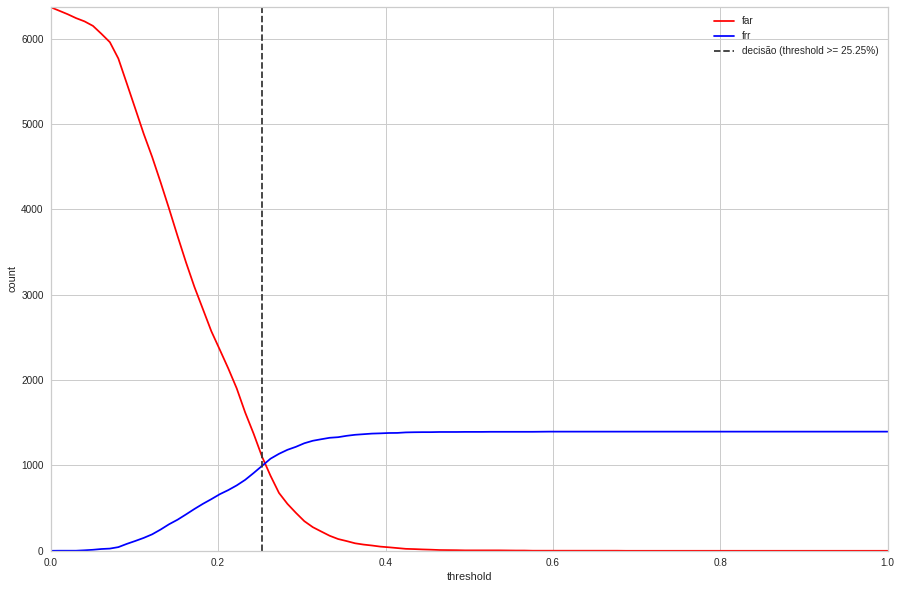

In [167]:
# FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.84      0.83      0.83      6368
        True       0.27      0.29      0.28      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.56      0.56      7764
weighted avg       0.74      0.73      0.73      7764



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


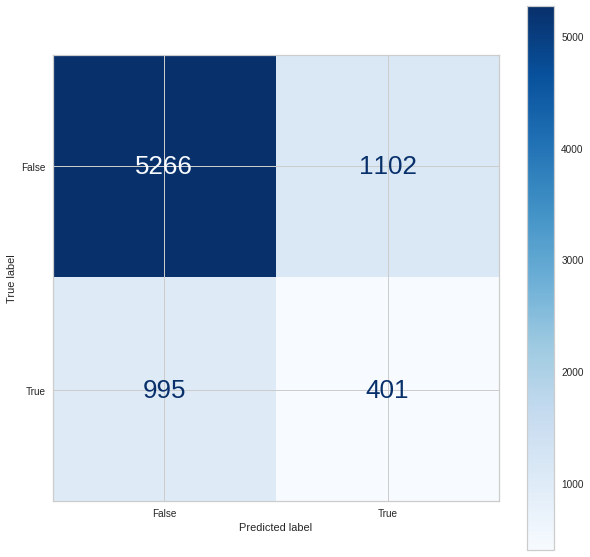

In [168]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

### Tabela de Resultados

In [169]:
nome_modelo = 'RandomForestClassifier'

In [170]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000)}

In [171]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254}

In [172]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055
RandomForestClassifier,5266.0,1102.0,995.0,401.0,0.729907,0.266800,0.287249,0.276647


### **Gradient Boosting Trees**

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
model = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model.fit(train_dataset.values, clients_tr.is_churn.values)

GradientBoostingClassifier(max_depth=5)

Avaliação do Treinamento

In [175]:
#Massa de treino
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx05072    0.216505
cx03836    0.345640
cx08472    0.295455
cx12946    0.230175
cx19045    0.140510
             ...   
cx05312    0.222449
cx02434    0.144588
cx16024    0.271597
cx11285    0.064412
cx00861    0.253963
Length: 23292, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


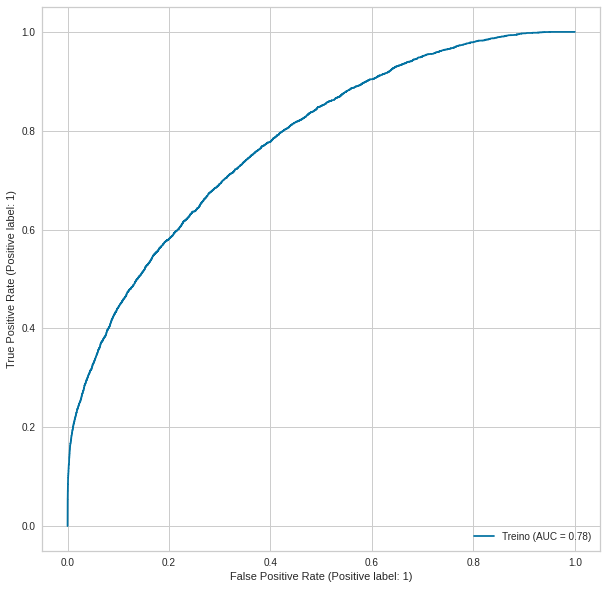

In [176]:
# Roc AUC
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

Threshold de Treino: 0.25252525252525254


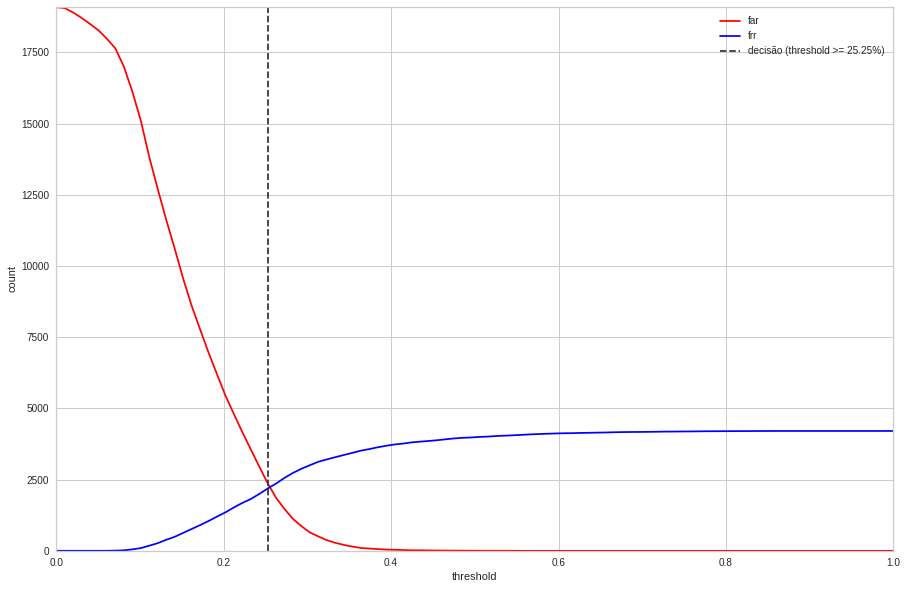

In [177]:
# FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.88      0.88      0.88     19085
        True       0.46      0.48      0.47      4207

    accuracy                           0.80     23292
   macro avg       0.67      0.68      0.67     23292
weighted avg       0.81      0.80      0.81     23292



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


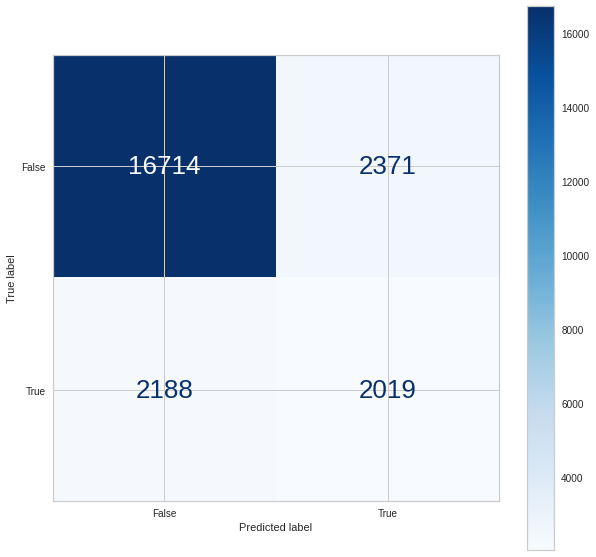

In [178]:
#Métricas de classificação
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

In [179]:
#Massa de teste
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx06840    0.409225
cx01931    0.239481
cx35431    0.217307
cx36233    0.177119
cx13540    0.305211
             ...   
cx19119    0.134910
cx21963    0.240612
cx37195    0.209233
cx16851    0.122556
cx15796    0.086567
Length: 7764, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


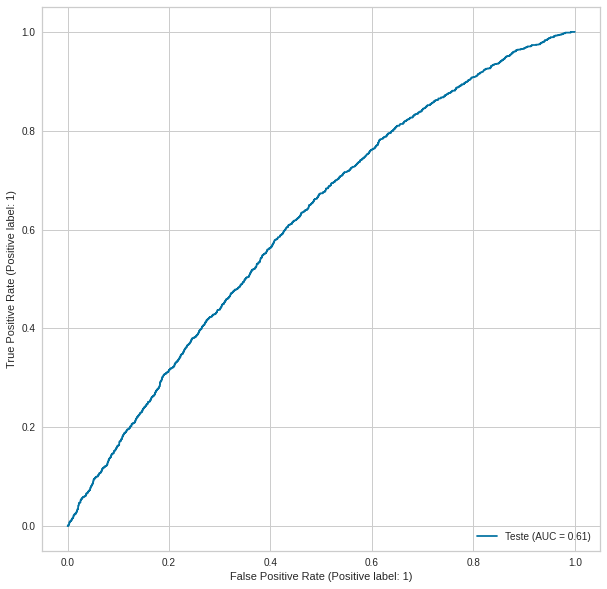

In [180]:
#Roc AUC
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


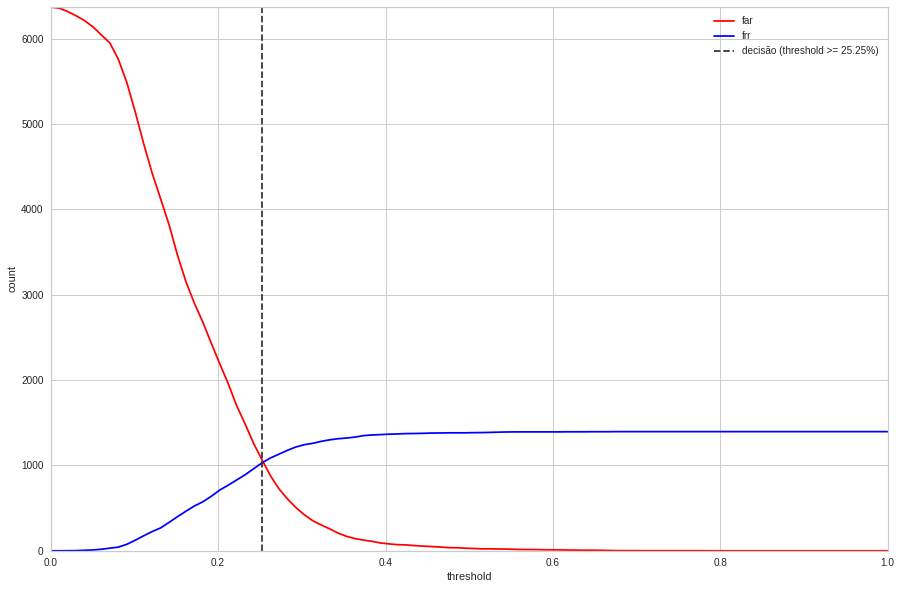

In [181]:
#Far/FRR
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.84      0.83      0.83      6368
        True       0.26      0.26      0.26      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.73      0.73      0.73      7764



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


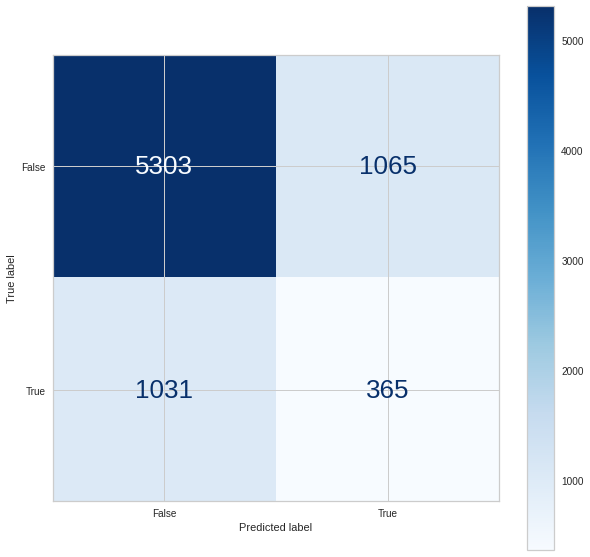

In [182]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

### Tabela de Resultados

In [183]:
nome_modelo = 'GradientBoostingTrees'

In [184]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5),
 'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000)}

In [185]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'GradientBoostingTrees': 0.25252525252525254,
 'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254}

In [186]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055
RandomForestClassifier,5266.0,1102.0,995.0,401.0,0.729907,0.266800,0.287249,0.276647
GradientBoostingTrees,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316


## Agrupando Modelos em um *Ensemble*

Com vários modelos treinados, é interessante treinar um [_ensemble_ do tipo _stacking_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) com os modelos mais promissores dentre os treinados. 


Antes de treinar o _stacking_, deve-se buscar entender **quais modelos são interessantes** para compor esse _ensemble_, já que há bastante custo computacional envolvido em combinar modelos. Uma técnica interessante é **verificar quais modelos são mais complementares** e qual combinação de modelos teria o **potencial ótimo**, i.e. o maior ganho teórico. 



Verificando a Complementariedade dos Modelos

In [187]:
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055
RandomForestClassifier,5266.0,1102.0,995.0,401.0,0.729907,0.266800,0.287249,0.276647
GradientBoostingTrees,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316


In [188]:
predictions = pd.DataFrame({
    k: modelos_treinados[k].predict_proba(test_dataset)[:, 1] >= modelos_threshold[k]
    for k in tabela_resultados.index
})
predictions.index = test_dataset.index

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [189]:
index = (predictions == y_true_te).any(1)
y_pred_te_opt = y_true_te[index].append(~y_true_te[~index])[y_true_te.index]
y_pred_te_opt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


client_id
cx06840     True
cx01931     True
cx35431     True
cx36233     True
cx13540     True
           ...  
cx19119     True
cx21963     True
cx37195     True
cx16851     True
cx15796    False
Name: is_churn, Length: 7764, dtype: bool

              precision    recall  f1-score   support

       False       0.00      0.00      0.00    6368.0
        True       0.00      0.00      0.00    1396.0

    accuracy                           0.00    7764.0
   macro avg       0.00      0.00      0.00    7764.0
weighted avg       0.00      0.00      0.00    7764.0



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


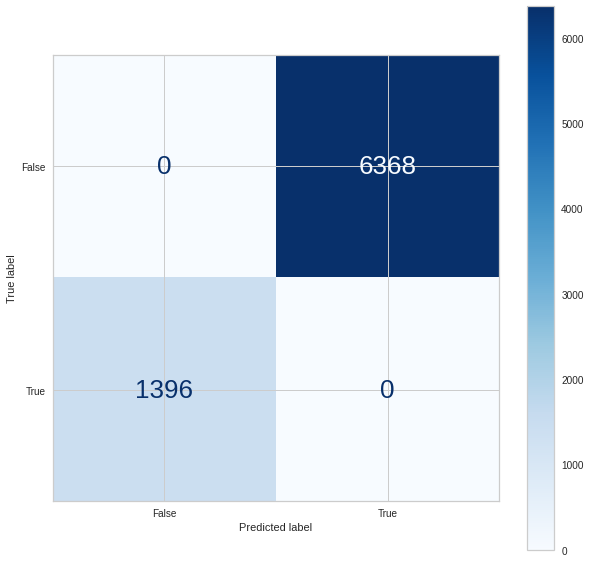

In [190]:
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_pred_te_opt.astype(float), 
    threshold=1., 
    fontsize=26, 
    values_format='d'
)

In [191]:
tabela_resultados = results_table(
    'Ensemble Teórico Ótimo', 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055
RandomForestClassifier,5266.0,1102.0,995.0,401.0,0.729907,0.266800,0.287249,0.276647
GradientBoostingTrees,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316
Ensemble Teórico Ótimo,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316


### Treinando um StackingClassifier

Treinamento

In [192]:
from sklearn.ensemble import StackingClassifier

In [193]:
modelos_treinados

{'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5),
 'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000)}

In [194]:
model = StackingClassifier(
    estimators=list(modelos_treinados.items()),
    final_estimator=RandomForestClassifier(n_estimators=2000, max_depth=10),
    passthrough=True    
)
model.fit(train_dataset.values, clients_tr.is_churn.values)

StackingClassifier(estimators=[('LogisticRegression (baseline)',
                                LogisticRegression(max_iter=1000)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(max_depth=13,
                                                       n_estimators=5000)),
                               ('GradientBoostingTrees',
                                GradientBoostingClassifier(max_depth=5))],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          n_estimators=2000),
                   passthrough=True)

In [195]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx05072    0.207833
cx03836    0.311003
cx08472    0.243731
cx12946    0.239773
cx19045    0.195140
             ...   
cx05312    0.242600
cx02434    0.127879
cx16024    0.257756
cx11285    0.139583
cx00861    0.253346
Length: 23292, dtype: float64

Avaliação do Treinamento

In [196]:
#MAssa de treino
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx05072    0.207833
cx03836    0.311003
cx08472    0.243731
cx12946    0.239773
cx19045    0.195140
             ...   
cx05312    0.242600
cx02434    0.127879
cx16024    0.257756
cx11285    0.139583
cx00861    0.253346
Length: 23292, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


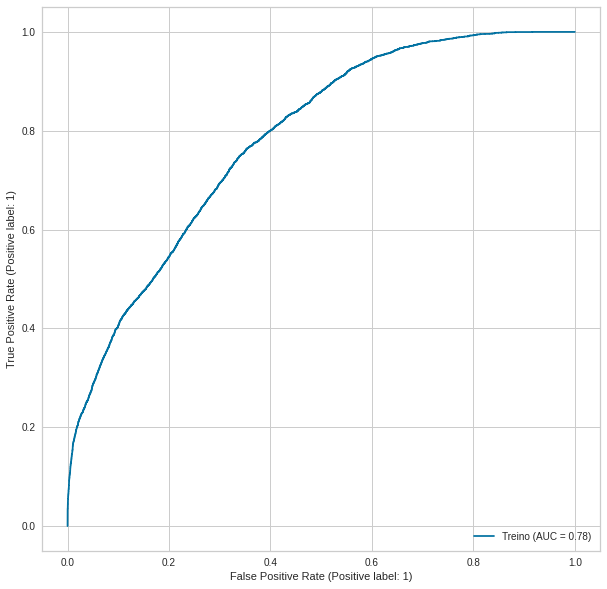

In [197]:
#Roc AUc
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

Threshold de Treino: 0.25252525252525254


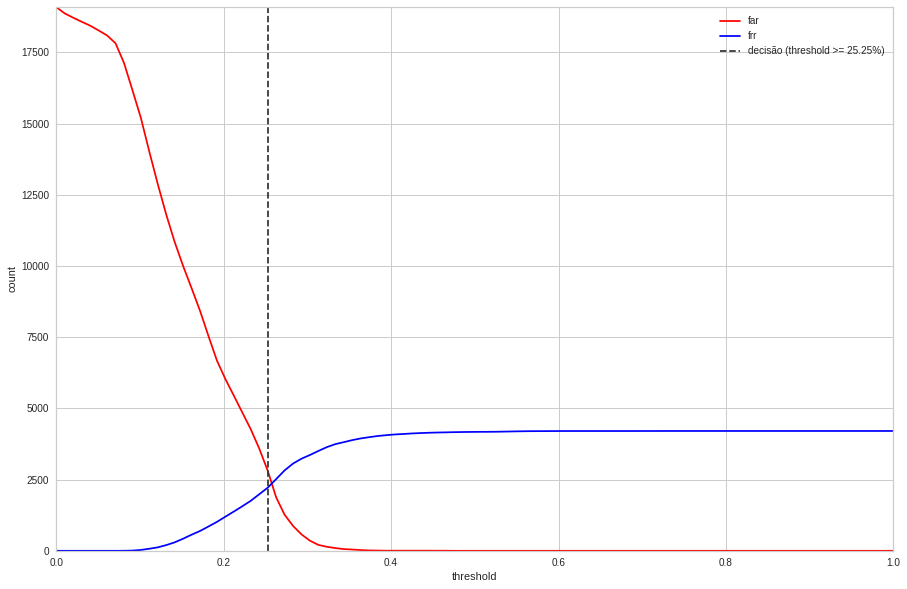

In [198]:
#FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.88      0.85      0.87     19085
        True       0.41      0.47      0.44      4207

    accuracy                           0.78     23292
   macro avg       0.65      0.66      0.65     23292
weighted avg       0.80      0.78      0.79     23292



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


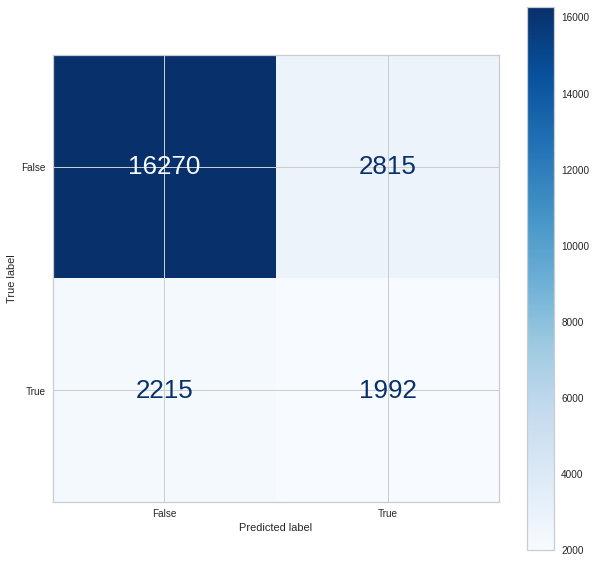

In [199]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

In [200]:
#Massa de teste
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


client_id
cx06840    0.282285
cx01931    0.247560
cx35431    0.222939
cx36233    0.213398
cx13540    0.302906
             ...   
cx19119    0.120731
cx21963    0.215759
cx37195    0.213520
cx16851    0.122821
cx15796    0.106038
Length: 7764, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


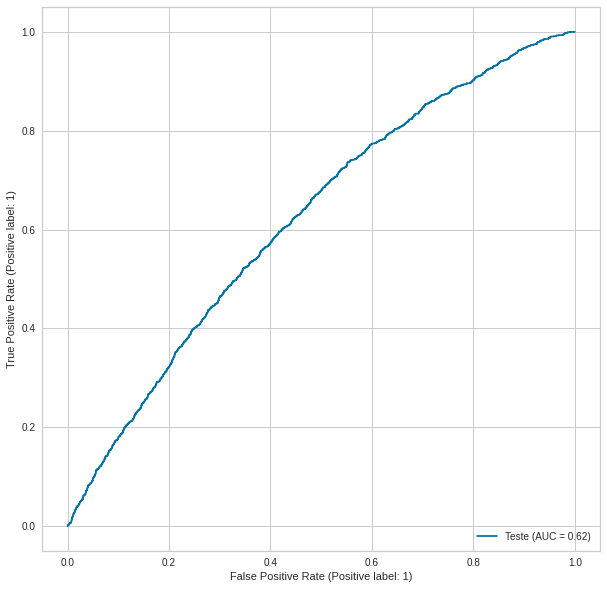

In [201]:
#Roc AUC
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


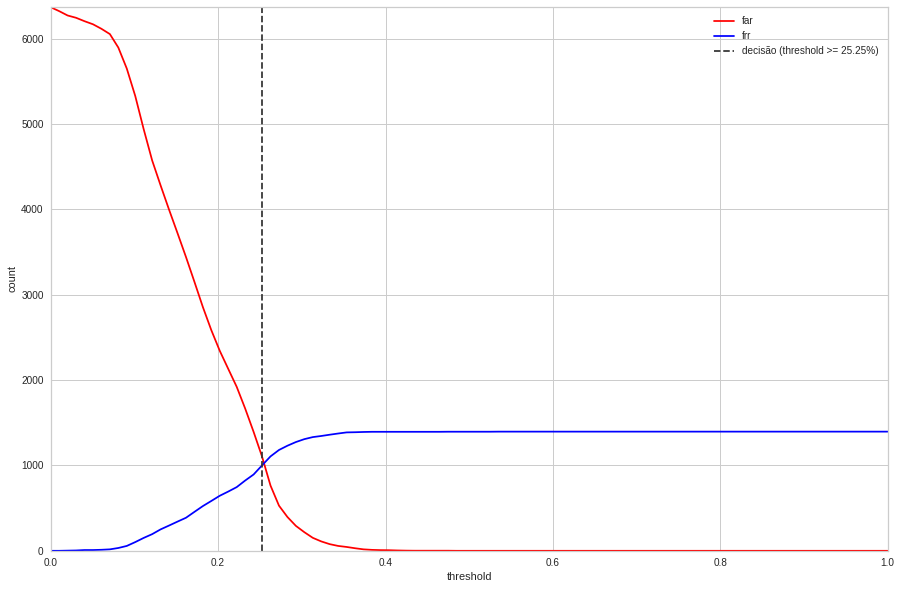

In [202]:
#FAR/FRR
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

              precision    recall  f1-score   support

       False       0.84      0.83      0.83      6368
        True       0.26      0.28      0.27      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.74      0.73      0.73      7764



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


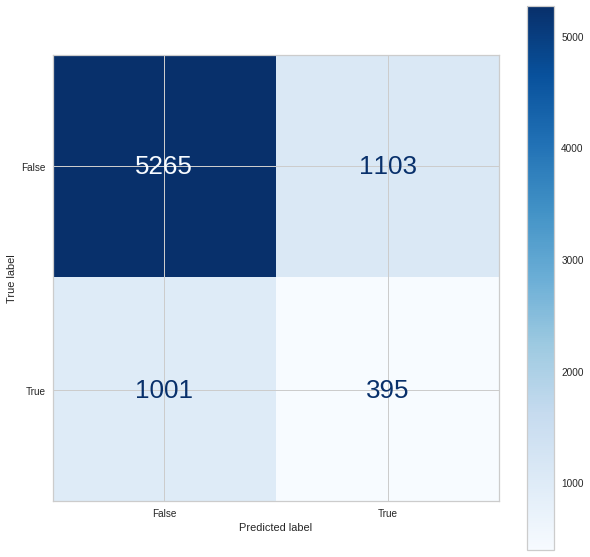

In [203]:
#Métricas de Classificação
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

### Tabela de Resultados

In [204]:
nome_modelo = 'StackingClassifier (Ensemble)'

In [205]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5),
 'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000),
 'StackingClassifier (Ensemble)': StackingClassifier(estimators=[('LogisticRegression (baseline)',
                                 LogisticRegression(max_iter=1000)),
                                ('RandomForestClassifier',
                                 RandomForestClassifier(max_depth=13,
                                                        n_estimators=5000)),
                                ('GradientBoostingTrees',
                                 GradientBoostingClassifier(max_depth=5))],
                    final_estimator=RandomForestClassifier(max_depth=10,
                                                           n_estimators=2000),
                    passthrough=True)}

In [206]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'GradientBoostingTrees': 0.25252525252525254,
 'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254,
 'StackingClassifier (Ensemble)': 0.25252525252525254}

In [207]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5334.0,1034.0,1044.0,352.0,0.732354,0.253968,0.252149,0.253055
RandomForestClassifier,5266.0,1102.0,995.0,401.0,0.729907,0.266800,0.287249,0.276647
GradientBoostingTrees,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316
Ensemble Teórico Ótimo,5303.0,1065.0,1031.0,365.0,0.730036,0.255245,0.261461,0.258316
StackingClassifier (Ensemble),5265.0,1103.0,1001.0,395.0,0.729006,0.263685,0.282951,0.272979
